In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

os.chdir("/Users/jacobrichards/Desktop/DS_DA_Projects/Marketing_Prediction")

data = pd.read_csv("data.csv", na_values=["", "NA"])

In [3]:
import pandas as pd
import numpy as np

# Replace missing or empty values in columns 4, 5, 6 with "unknown"
data.iloc[:, [3, 4, 5]] = data.iloc[:, [3, 4, 5]].applymap(lambda x: "unknown" if pd.isna(x) or x == "" else x)

# Replace income with appropriate midpoints or custom values
income_mapping = {
    "unknown": 6,              # replacing unknown with the median income level
    "Under $10k": 1,            # midpoint of "Under $10k"
    "10-19,999": 2,            # midpoint of "10-19,999"
    "20-29,999": 3,            # midpoint of "20-29,999"
    "30-39,999": 4,            # midpoint of "30-39,999"
    "40-49,999": 5,            # midpoint of "40-49,999"
    "50-59,999": 6,            # midpoint of "50-59,999"
    "60-69,999": 7,            # midpoint of "60-69,999"
    "70-79,999": 8,            # midpoint of "70-79,999"
    "80-89,999": 9,            # midpoint of "80-89,999"
    "90-99,999": 10,            # midpoint of "90-99,999"
    "100-149,999": 11,         # midpoint of "100-149,999"
    "150 - 174,999": 12,       # midpoint of "150 - 174,999"
    "175 - 199,999": 13,       # midpoint of "175 - 199,999"
    "200 - 249,999": 14,       # midpoint of "200 - 249,999"
    "250k+": 15               # custom value for "250k+"
}
data["income"] = data["income"].map(income_mapping).astype(int)

# Replace gender with 1 for male, 0 for female, and 0 for unknown
gender_mapping = {"M": 1, "F": 0, "unknown": 0}
data["gender"] = data["gender"].map(gender_mapping).astype(int)

# Replace marital_status with 1 for married, 0 for single, and 1 for unknown
marital_status_mapping = {"M": 1, "S": 0, "unknown": 1}
data["marital_status"] = data["marital_status"].map(marital_status_mapping).astype(int)

# Convert target to categorical values (0 or 1)
data["target"] = data["target"].astype(int)

# Convert distance (dist) column to integer
data["dist"] = data["dist"].astype(int)

/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_54178/2211222545.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data.iloc[:, [3, 4, 5]] = data.iloc[:, [3, 4, 5]].applymap(lambda x: "unknown" if pd.isna(x) or x == "" else x)


In [4]:
display(data.head())

id  age  dist  income  gender  marital_status  target
0   1   73     4      10       1               0       1
1   2   89     1      11       1               1       1
2   3   85     1       2       0               0       1
3   4   76     2      10       1               1       1
4   5   76     2       2       1               0       1

We want to build a Binary Classifier model. Let's build a Logistic Regression and do some preliminary diagnostic to see if such a model would be appropiate for our give data. 

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictor = data[['age', 'dist', 'income','gender','marital_status']] 
response = data['target']  

model = LogisticRegression()
model.fit(predictor, response) 

LogisticRegression()

                     age      dist    income    gender  marital_status
age             1.000000 -0.047106 -0.226870 -0.028445        0.015544
dist           -0.047106  1.000000 -0.084710  0.007639        0.000356
income         -0.226870 -0.084710  1.000000  0.118216        0.291409
gender         -0.028445  0.007639  0.118216  1.000000        0.107952
marital_status  0.015544  0.000356  0.291409  0.107952        1.000000


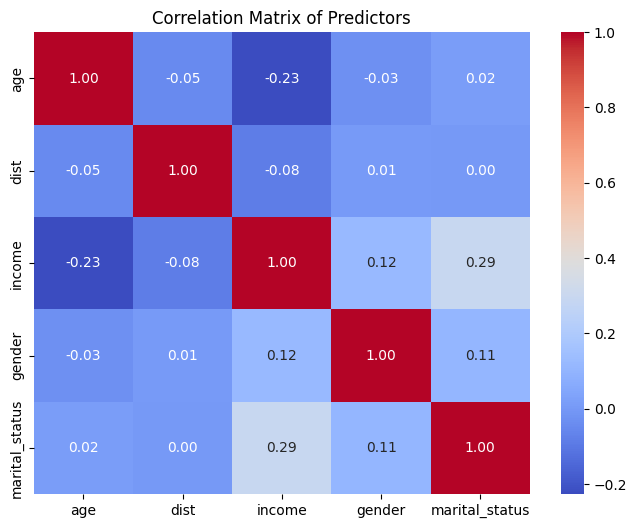

In [6]:
import pandas as pd

# Select predictors
predictors = data[['age', 'dist', 'income', 'gender', 'marital_status']]

# Calculate the correlation matrix
correlation_matrix = predictors.corr()

# Display the correlation matrix
print(correlation_matrix)


import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Predictors")
plt.show()

Check our model summary 

distance is insignifigant 

In [7]:
import statsmodels.api as sm

predictor = data[['age', 'income','dist', 'gender', 'marital_status']]
response = data['target']

predictor_with_const = sm.add_constant(predictor)

logit_model = sm.Logit(response, predictor_with_const)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.527865
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3994
Method:                           MLE   Df Model:                            5
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                 0.06130
Time:                        08:45:33   Log-Likelihood:                -2111.5
converged:                       True   LL-Null:                       -2249.3
Covariance Type:            nonrobust   LLR p-value:                 1.619e-57
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.3820      0.401    -10.915      0.000      -5.169      -3.595
age              

The Pseudo R-square isn't great, let's check out the Logit plots of our predictors as they all reject the null that they equal zero.

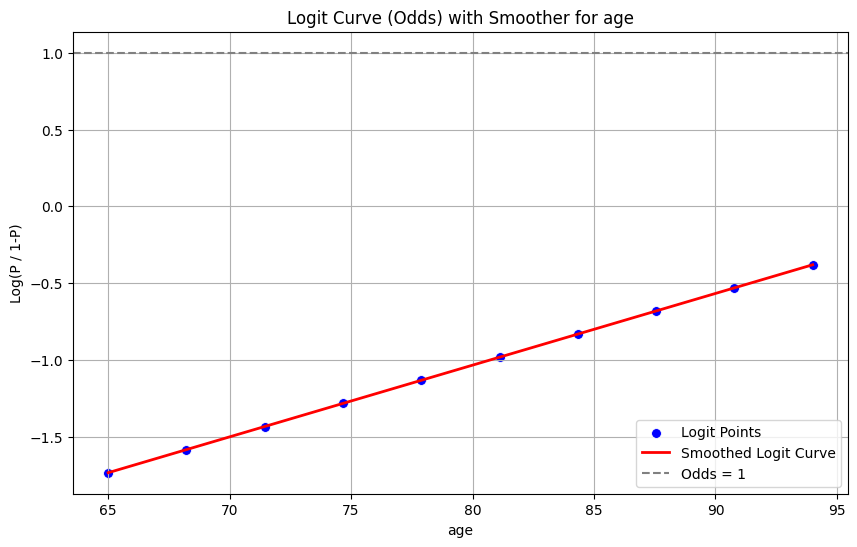

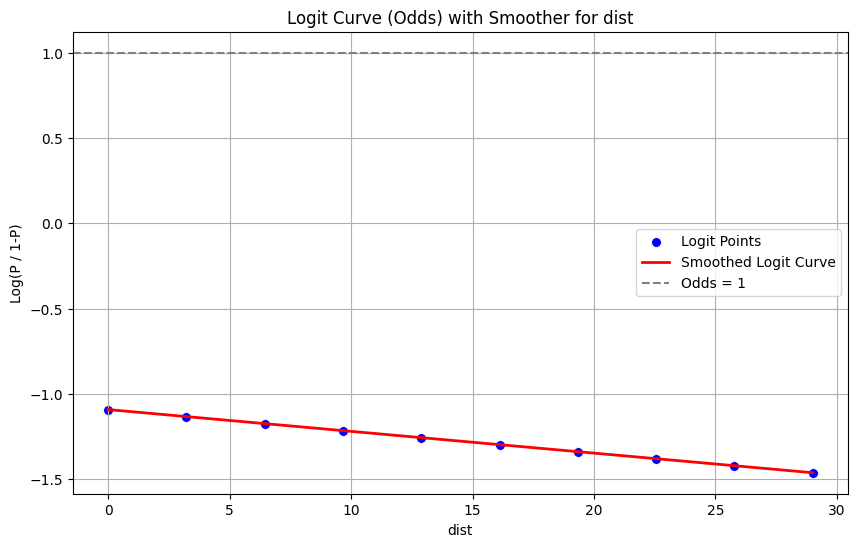

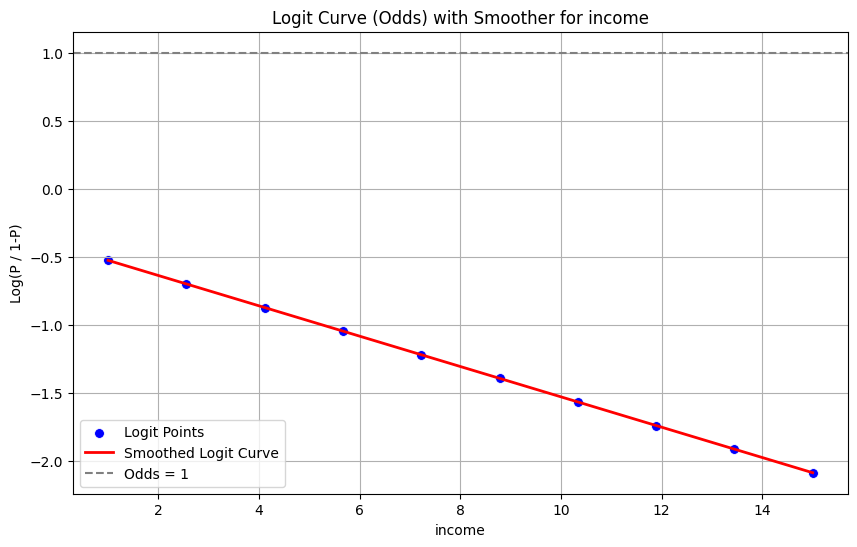

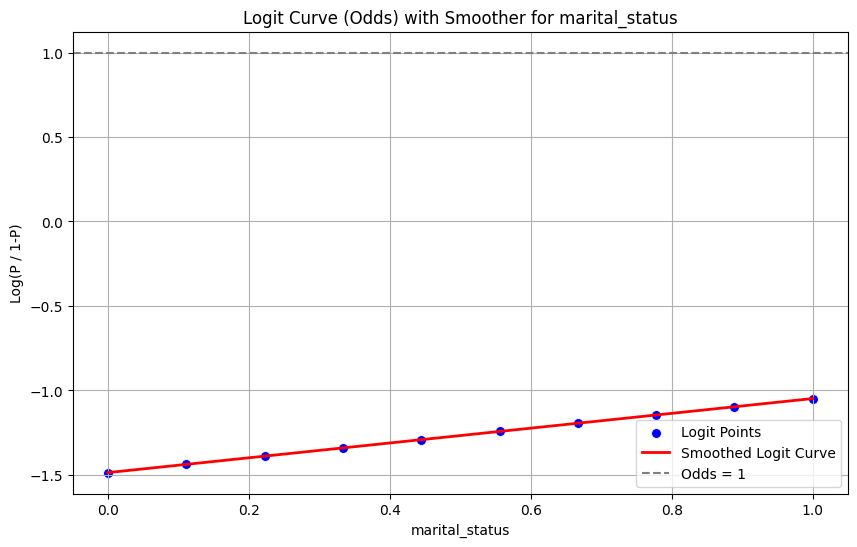

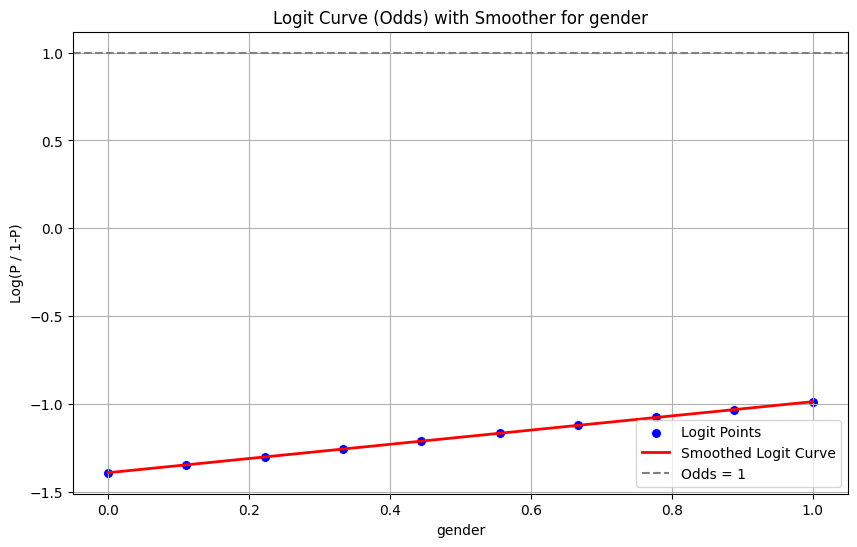

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

def plot_logit_curve_with_smoother(result, predictor, feature_name):
    """
    Plot the logit curve (odds) for a given feature with scatter points and a smoother.

    Parameters:
    - result: Fitted logistic regression model.
    - predictor: Training dataset of predictors.
    - feature_name: The feature for which to plot the logit curve.
    """
    # Generate a range of values for the selected feature
    feature_values = np.linspace(predictor[feature_name].min(), predictor[feature_name].max(), 10)
    
    # Keep other predictors fixed at their mean
    fixed_predictors = predictor.mean(axis=0).copy()
    
    # Calculate the logit (odds) for each feature value
    log_odds = []
    for value in feature_values:
        temp_predictors = fixed_predictors.copy()
        temp_predictors[feature_name] = value
        
        # Add constant and ensure shape matches model coefficients
        predictors_with_const = sm.add_constant(temp_predictors.values.reshape(1, -1), has_constant='add')
        logit = np.dot(predictors_with_const, result.params)
        #odds = np.exp(logit)  this is ploting the log(p/1-p) i just ommited the exp()
        log_odds.append(logit[0])
    
    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        feature_name: feature_values,
        'log_odds': log_odds
    })
    
    # Plot the logit curve with points and smoother
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature_name, y='log_odds', data=plot_df, color='blue', s=50, label='Logit Points')
    sns.regplot(x=feature_name, y='log_odds', data=plot_df, scatter=False, lowess=True, 
                color='red', line_kws={'lw': 2}, label='Smoothed Logit Curve')
    
    plt.title(f'Logit Curve (Odds) with Smoother for {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Log(P / 1-P)')
    plt.axhline(1, color='grey', linestyle='--', label='Odds = 1')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
plot_logit_curve_with_smoother(result, predictor, 'age')
plot_logit_curve_with_smoother(result, predictor, 'dist')
plot_logit_curve_with_smoother(result, predictor, 'income')
plot_logit_curve_with_smoother(result, predictor, 'marital_status')
plot_logit_curve_with_smoother(result, predictor, 'gender')



These are incredibly weak predictors. Are these variables even coorelated with the outcome in the first place? 

In [9]:
import pandas as pd
from scipy.stats import pointbiserialr

def calculate_point_biserial(df, continuous_var, binary_var):
    """
    Calculate the point-biserial correlation between a continuous predictor and a binary variable.
    
    Parameters:
    - df: Pandas DataFrame containing the data.
    - continuous_var: Name of the continuous predictor column.
    - binary_var: Name of the binary dependent variable column.

    Returns:
    - correlation: Point-biserial correlation coefficient.
    - p_value: p-value for testing significance of the correlation.
    """
    # Ensure the binary variable only contains 0 and 1
    if not set(df[binary_var].unique()).issubset({0, 1}):
        raise ValueError("The binary variable must only contain 0 and 1.")
    
    # Calculate point-biserial correlation
    correlation, p_value = pointbiserialr(df[continuous_var], df[binary_var])
    
    print(f"Point-Biserial Correlation between {continuous_var} and {binary_var}: {correlation:.4f}")
    print(f"P-value: {p_value:.4e}")
    return correlation, p_value


calculate_point_biserial(data, 'age', 'target')
calculate_point_biserial(data, 'dist', 'target')
calculate_point_biserial(data, 'income', 'target')
calculate_point_biserial(data, 'marital_status', 'target')
calculate_point_biserial(data, 'gender', 'target')

Point-Biserial Correlation between age and target: 0.1970
P-value: 2.8301e-36
Point-Biserial Correlation between dist and target: -0.0293
P-value: 6.3509e-02
Point-Biserial Correlation between income and target: -0.1585
P-value: 6.3378e-24
Point-Biserial Correlation between marital_status and target: 0.0488
P-value: 2.0292e-03
Point-Biserial Correlation between gender and target: 0.0667
P-value: 2.4297e-05


(np.float64(0.06669003349761873), np.float64(2.429733607385458e-05))

the greatest coorelation here is age, let's see what the scatter plot of the actual predictor values are against predicted probability. The previous plot was the modeled relationship between predictor variables and probabilities. 

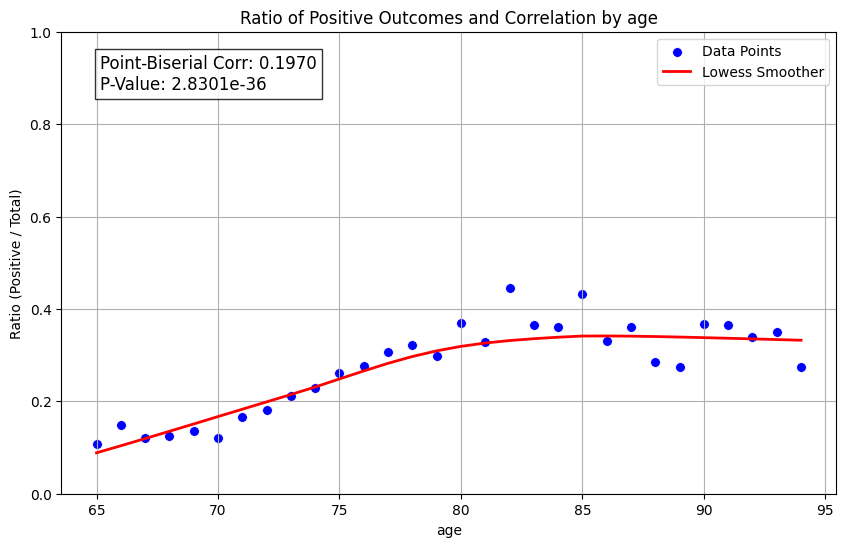

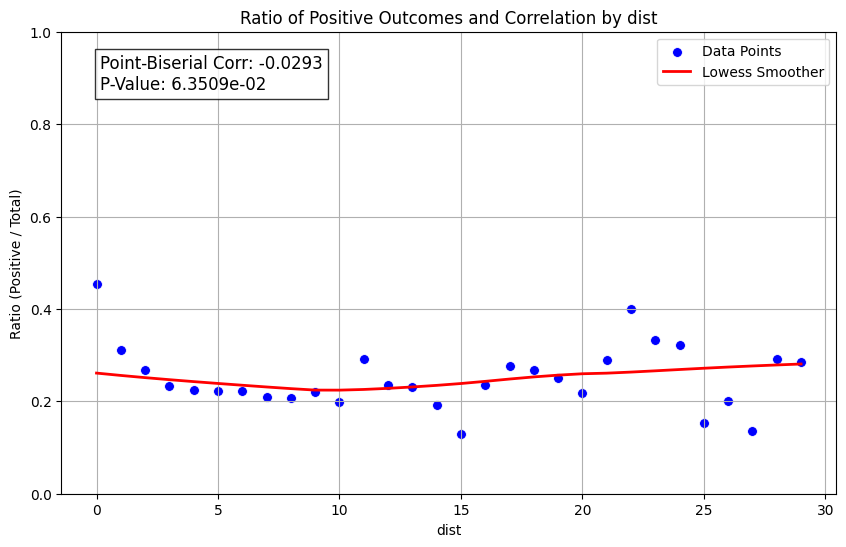

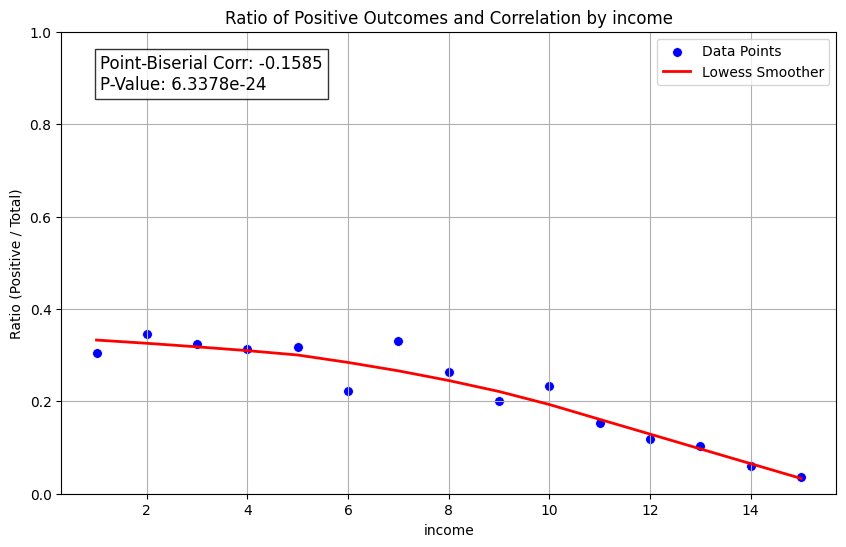

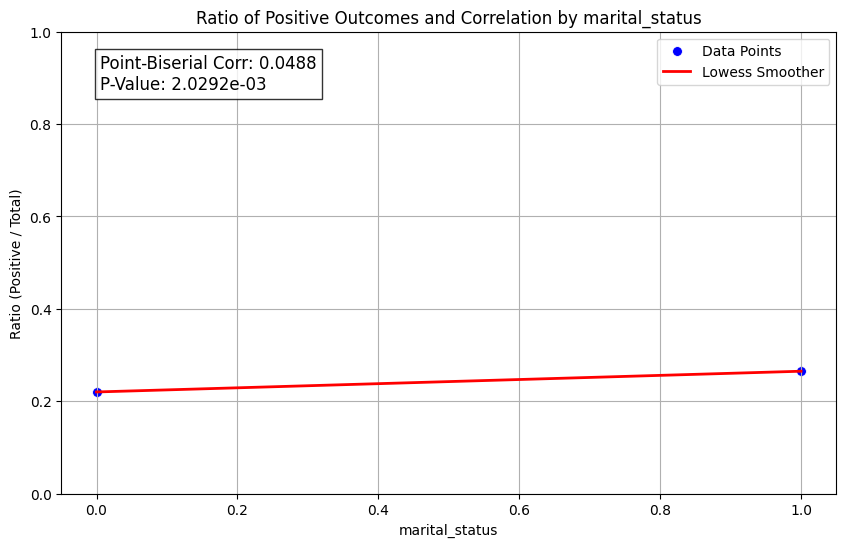

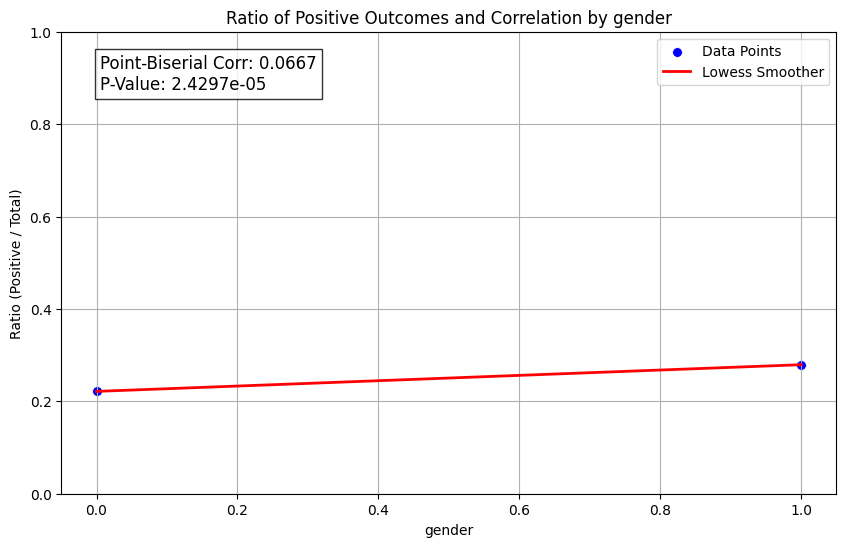

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

def plot_ratio_positive_negative_with_corr(df, continuous_var, categorical_var='target', positive_value=1, negative_value=0):
    """
    Plot the ratio of positive to total outcomes for a continuous variable with a smoother
    and display the correlation coefficient.
    
    Parameters:
    - df: DataFrame containing the data.
    - continuous_var: Name of the continuous predictor column.
    - categorical_var: Name of the binary target column.
    - positive_value: Value representing positive outcomes (default=1).
    - negative_value: Value representing negative outcomes (default=0).
    """
    # Group by continuous variable and category to get counts
    grouped = df.groupby([continuous_var, categorical_var]).size().reset_index(name='count')
    
    # Pivot so we have positive and negative counts
    pivot = grouped.pivot(index=continuous_var, columns=categorical_var, values='count').fillna(0)
    
    # Extract positive and total counts
    positive_counts = pivot[positive_value] if positive_value in pivot.columns else 0
    total_counts = positive_counts + pivot[negative_value] if negative_value in pivot.columns else positive_counts

    # To avoid division by zero, add a small epsilon
    epsilon = 1e-9
    ratio = positive_counts / (total_counts + epsilon)

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        continuous_var: ratio.index,
        'ratio_positive_negative': ratio.values
    })
    
    # Calculate Point-Biserial Correlation
    correlation, p_value = pointbiserialr(df[continuous_var], df[categorical_var])
    
    # Plot the points and smoother
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of ratio points
    sns.scatterplot(x=continuous_var, y='ratio_positive_negative', data=plot_df, color='blue', s=50, label='Data Points')

    # Add a smooth trend line (lowess)
    sns.regplot(x=continuous_var, y='ratio_positive_negative', data=plot_df, 
                scatter=False, lowess=True, color='red', line_kws={'lw': 2}, label='Lowess Smoother')

    # Add the correlation coefficient as text on the plot
    plt.text(0.05, 0.95, f'Point-Biserial Corr: {correlation:.4f}\nP-Value: {p_value:.4e}', 
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
    
    # Final plot settings
    plt.title(f'Ratio of Positive Outcomes and Correlation by {continuous_var}')
    plt.xlabel(continuous_var)
    plt.ylabel('Ratio (Positive / Total)')
    plt.ylim(0, 1)  # Ratio ranges between 0 and 1
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
plot_ratio_positive_negative_with_corr(data, 'age', 'target', positive_value=1, negative_value=0)
plot_ratio_positive_negative_with_corr(data, 'dist', 'target', positive_value=1, negative_value=0)
plot_ratio_positive_negative_with_corr(data, 'income', 'target', positive_value=1, negative_value=0)
plot_ratio_positive_negative_with_corr(data, 'marital_status', 'target', positive_value=1, negative_value=0)
plot_ratio_positive_negative_with_corr(data, 'gender', 'target', positive_value=1, negative_value=0)


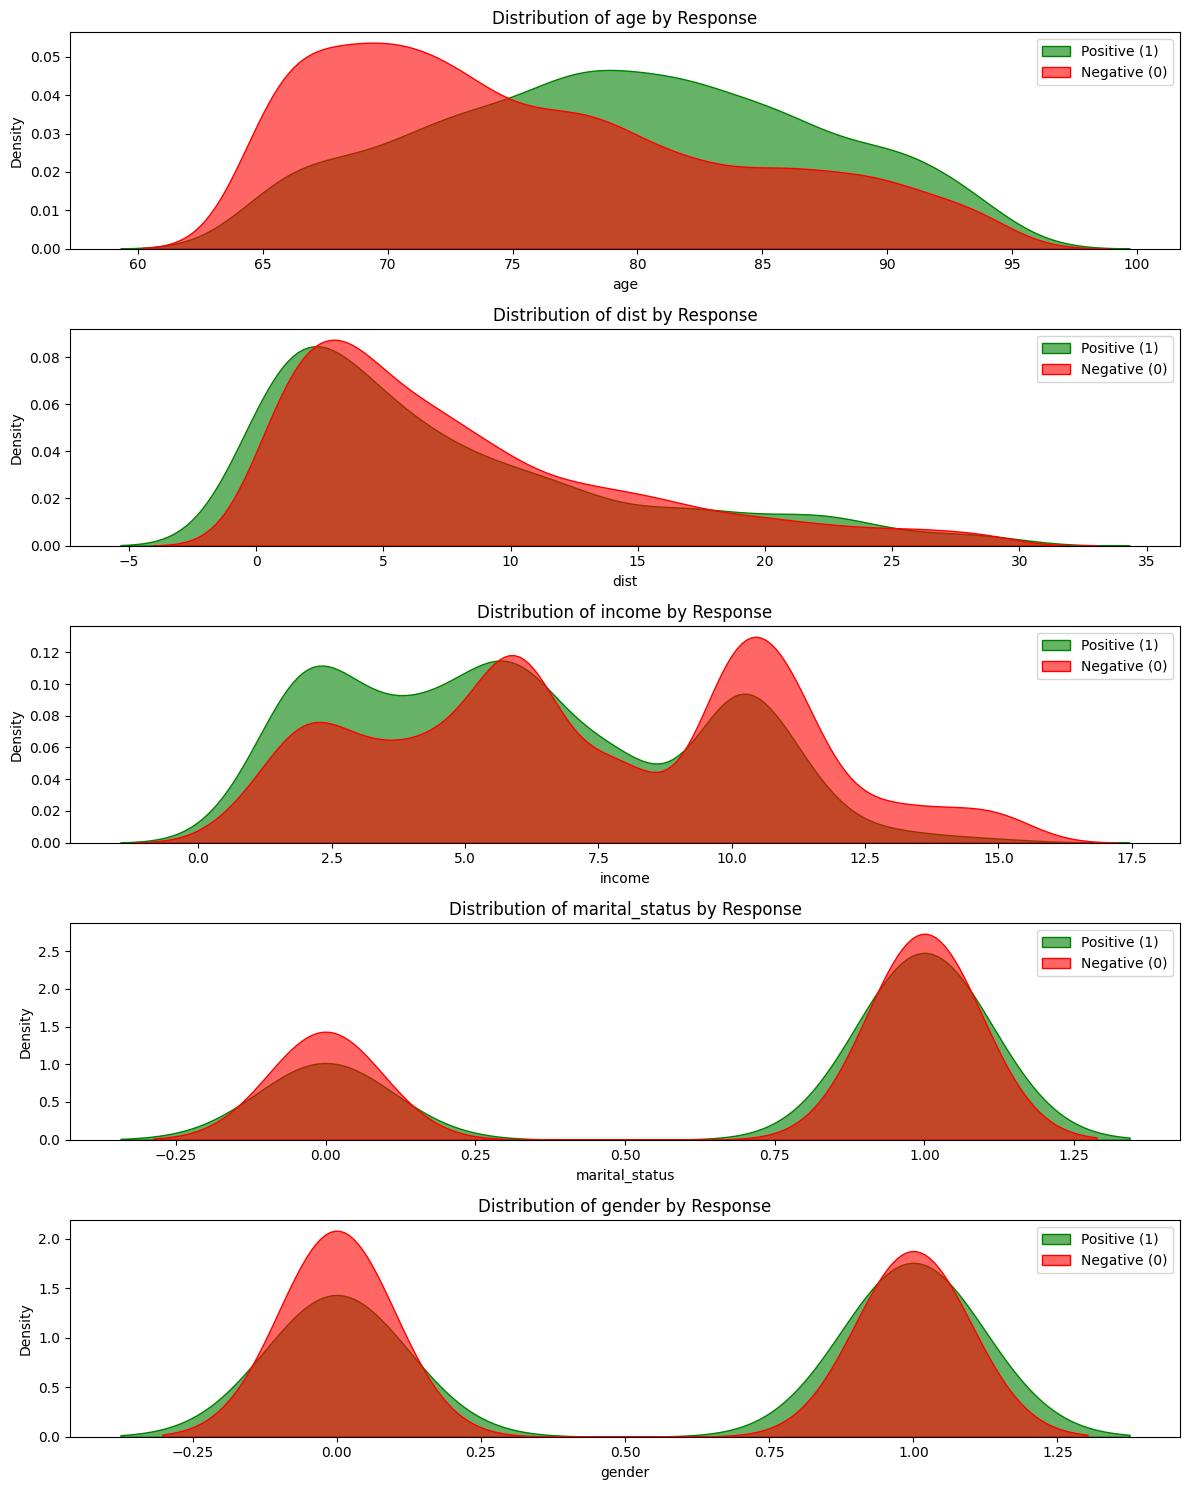

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def ridge_plot_by_response(df, variables, categorical_var='target', positive_value=1, negative_value=0):
    """
    Create ridge line plots for variables showing the distribution for positive and negative responses.
    
    Parameters:
    - df: DataFrame containing the data.
    - variables: List of continuous variables to plot.
    - categorical_var: Name of the binary target column.
    - positive_value: Value representing positive outcomes (default=1).
    - negative_value: Value representing negative outcomes (default=0).
    """
    # Create the ridge plot for each variable
    plt.figure(figsize=(12, len(variables) * 3))
    
    for i, var in enumerate(variables):
        plt.subplot(len(variables), 1, i + 1)
        
        # Positive responses
        sns.kdeplot(data=df[df[categorical_var] == positive_value], x=var, 
                    fill=True, alpha=0.6, label=f'Positive ({positive_value})', color='green')
        
        # Negative responses
        sns.kdeplot(data=df[df[categorical_var] == negative_value], x=var, 
                    fill=True, alpha=0.6, label=f'Negative ({negative_value})', color='red')
        
        # Add plot details
        plt.title(f'Distribution of {var} by Response')
        plt.xlabel(var)
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage:
variables = ['age', 'dist', 'income', 'marital_status', 'gender']
ridge_plot_by_response(data, variables, categorical_var='target', positive_value=1, negative_value=0)

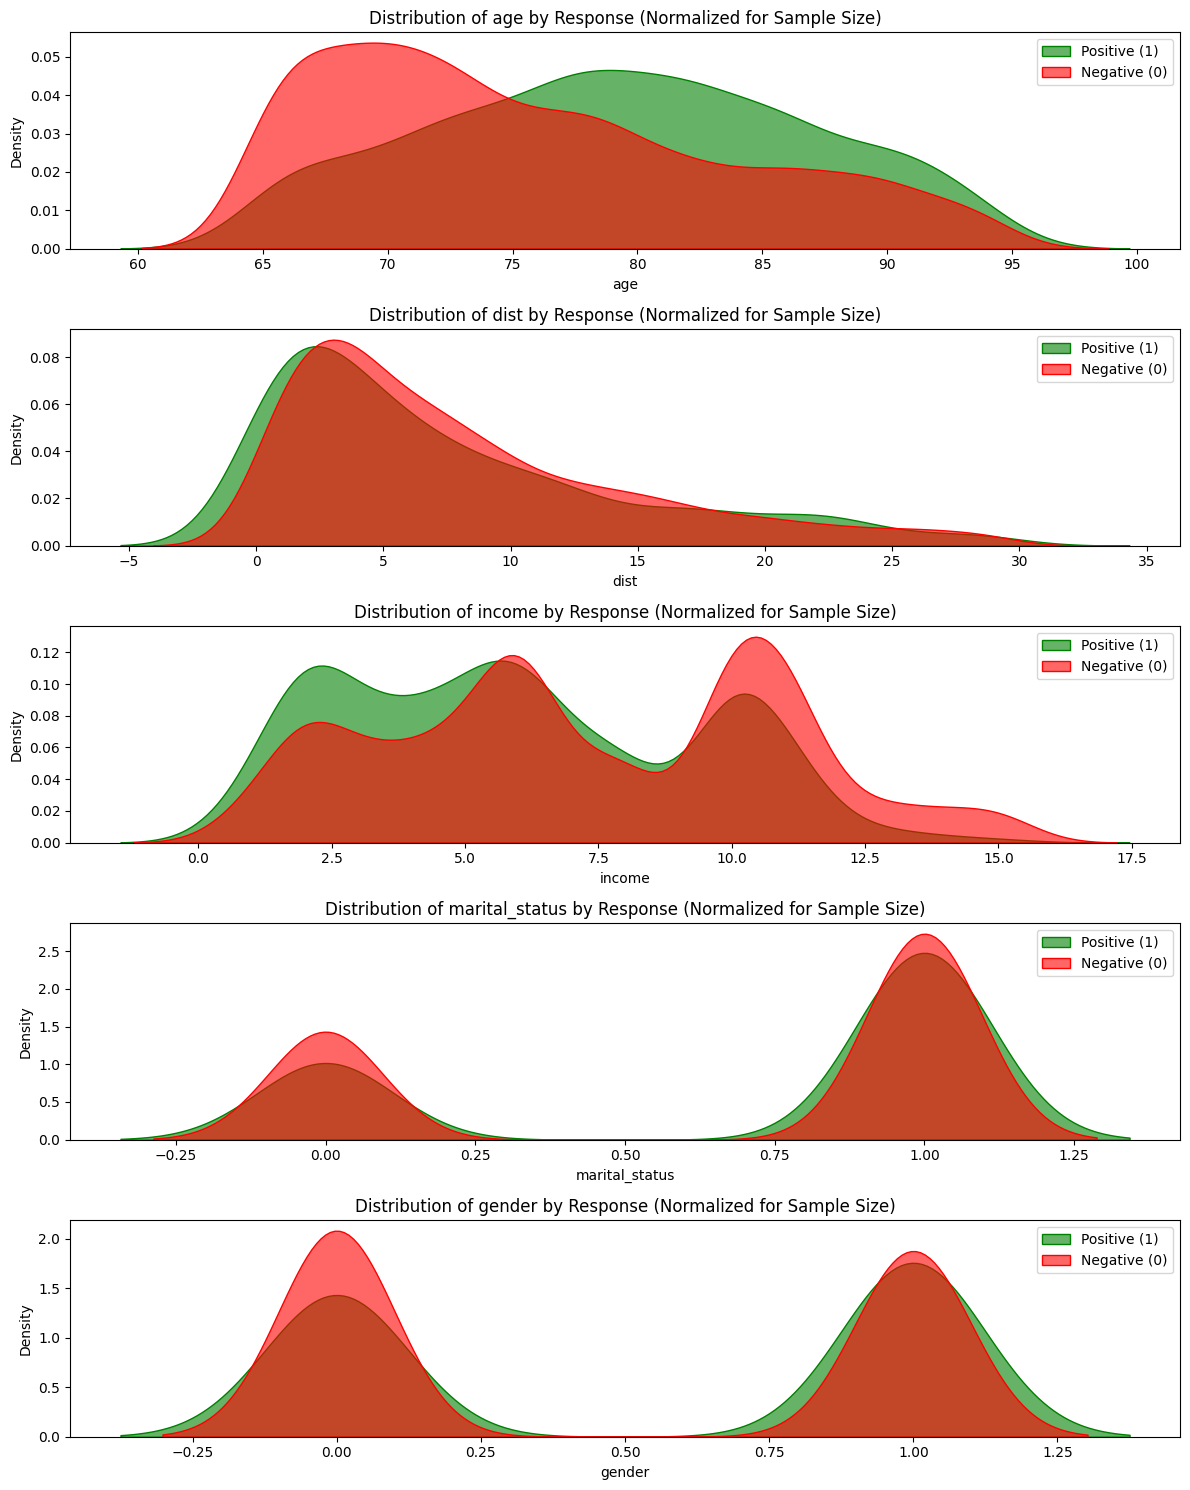

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def ridge_plot_by_response_with_normalization(df, variables, categorical_var='target', positive_value=1, negative_value=0):
    """
    Create ridge line plots for variables showing normalized distributions for positive and negative responses,
    accounting for sample size differences.
    
    Parameters:
    - df: DataFrame containing the data.
    - variables: List of continuous variables to plot.
    - categorical_var: Name of the binary target column.
    - positive_value: Value representing positive outcomes (default=1).
    - negative_value: Value representing negative outcomes (default=0).
    """
    # Calculate sample sizes for normalization
    total_positive = df[df[categorical_var] == positive_value].shape[0]
    total_negative = df[df[categorical_var] == negative_value].shape[0]

    plt.figure(figsize=(12, len(variables) * 3))

    for i, var in enumerate(variables):
        plt.subplot(len(variables), 1, i + 1)

        # Normalize weights
        positive_weights = 1 / total_positive if total_positive > 0 else 1
        negative_weights = 1 / total_negative if total_negative > 0 else 1

        # Positive response distribution
        sns.kdeplot(
            data=df[df[categorical_var] == positive_value],
            x=var,
            fill=True,
            alpha=0.6,
            label=f'Positive ({positive_value})',
            color='green',
            weights=[positive_weights] * total_positive
        )

        # Negative response distribution
        sns.kdeplot(
            data=df[df[categorical_var] == negative_value],
            x=var,
            fill=True,
            alpha=0.6,
            label=f'Negative ({negative_value})',
            color='red',
            weights=[negative_weights] * total_negative
        )

        # Plot details
        plt.title(f'Distribution of {var} by Response (Normalized for Sample Size)')
        plt.xlabel(var)
        plt.ylabel('Density')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
variables = ['age', 'dist', 'income', 'marital_status', 'gender']
ridge_plot_by_response_with_normalization(data, variables, categorical_var='target', positive_value=1, negative_value=0)

For the Logistic Regression model to be valid, the relationship between these variables does not need to be linear, but the relationship does need to have predictive power. If there isn't a clear predictor and response relationship between these these variabels and probability of posative outcome, this really isn't the right model to represent the relationship between these these variables and weither or not someone will actually respond to an advertising campaign. 

For the sake of demonstraighting why this is important, we will produce an ROC curve and a lift chart. 

ROC curve

keep in mind the Logistic Regression model is being trained and tested on the entire data set for the sake of demonstration.

Optimization terminated successfully.
         Current function value: 0.527865
         Iterations 6


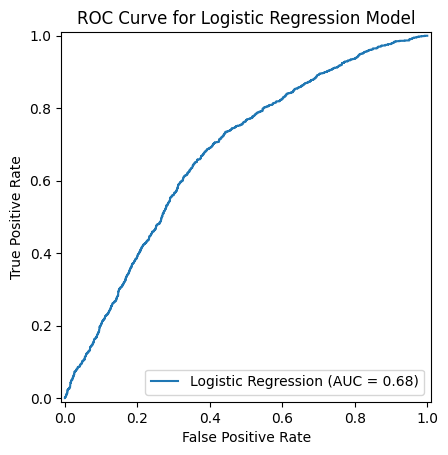

In [13]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

# Predictors and Response
predictor = data[['age', 'income', 'dist', 'gender', 'marital_status']]
response = data['target']

# Add constant for intercept
predictor_with_const = sm.add_constant(predictor)

# Fit logistic regression model
logit_model = sm.Logit(response, predictor_with_const)
result = logit_model.fit()

# Predict probabilities for the positive class
response_probs = result.predict(predictor_with_const)  # Use .predict() in statsmodels

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(response, response_probs)

# Plot ROC Curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr), estimator_name="Logistic Regression").plot()

# Show the plot
plt.title("ROC Curve for Logistic Regression Model")
plt.show()

68% AUC, not great but not terrible. So far everything is fine. 

Optimization terminated successfully.
         Current function value: 0.521321
         Iterations 6


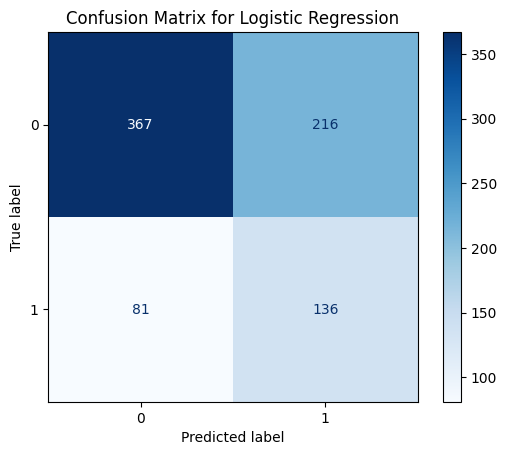

Model Performance Metrics on Testing Set:
Accuracy:  0.6288
Precision: 0.3864
Recall:    0.6267
F1-Score:  0.4780


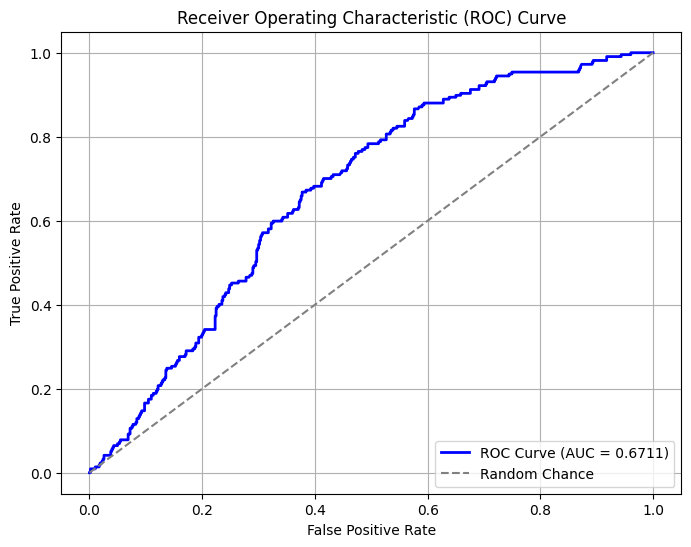

In [14]:
import statsmodels.api as sm
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, accuracy_score,
    precision_score, recall_score, f1_score, roc_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Define predictor and response variables
predictor = data[['age', 'income', 'dist', 'gender', 'marital_status']]
response = data['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size=0.2, random_state=42)

# Add constant for intercept to training and testing data
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit logistic regression model on the training set
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Predict probabilities for the positive class on the testing set
predicted_probs = result.predict(X_test_const)

# Convert probabilities to binary predictions (threshold = 0.5)
predicted_classes = np.where(predicted_probs >= 0.2440, 1, 0)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Compute associated statistics
accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)

# Print statistics
print("Model Performance Metrics on Testing Set:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Generate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Optimal Decision Threshold (Minimum Difference): 0.2440


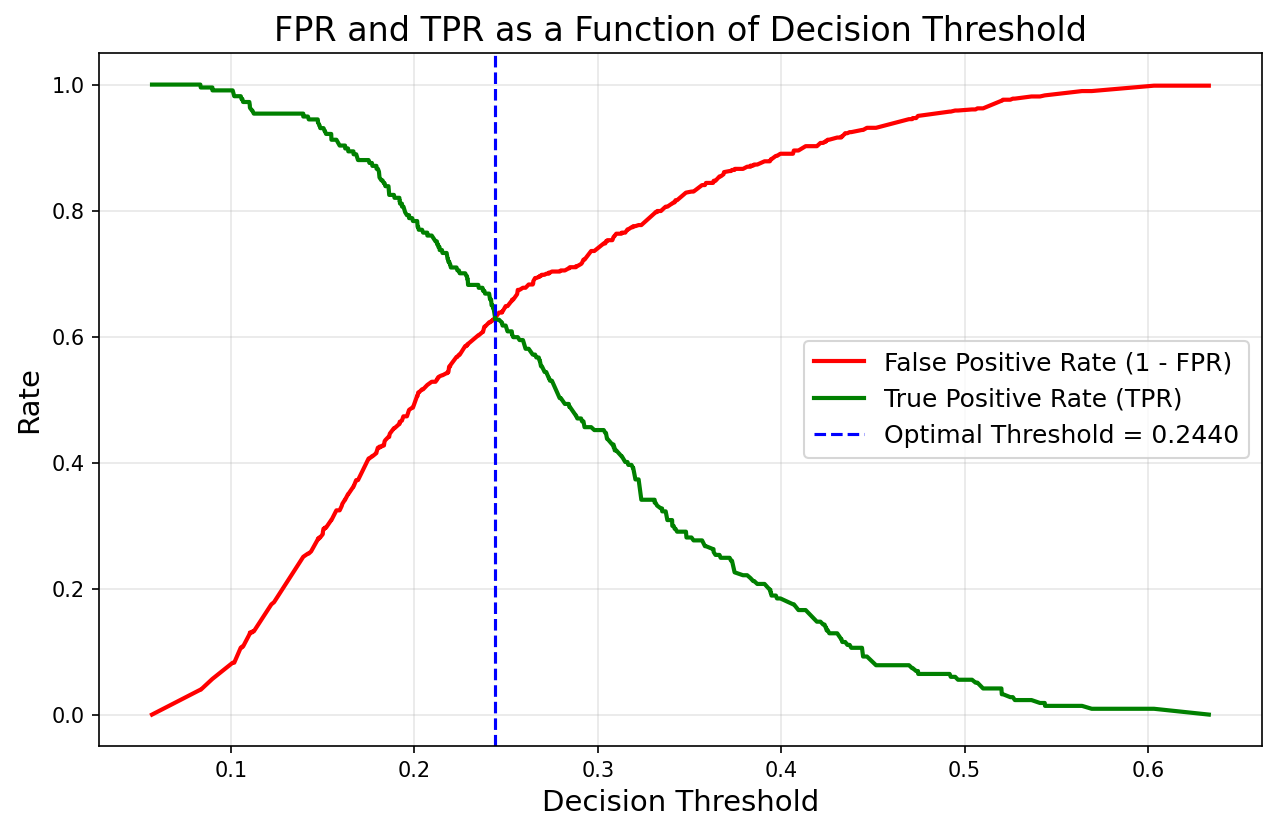

In [15]:
# Calculate the absolute difference between (1 - FPR) and TPR
diff = np.abs((1 - fpr) - tpr)

# Find the index of the minimum difference
min_diff_index = np.argmin(diff)

# Get the corresponding threshold
optimal_threshold = thresholds[min_diff_index]

# Print the optimal threshold
print(f"Optimal Decision Threshold (Minimum Difference): {optimal_threshold:.4f}")

# Highlight the optimal threshold on the plot
plt.figure(figsize=(10, 6), dpi=150)

# Plot FPR vs threshold
plt.plot(thresholds, (1 - fpr), label='False Positive Rate (1 - FPR)', color='red', lw=2)

# Plot TPR vs threshold
plt.plot(thresholds, tpr, label='True Positive Rate (TPR)', color='green', lw=2)

# Add a vertical line for the optimal threshold
plt.axvline(x=optimal_threshold, color='blue', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.4f}')

# Add labels and legend
plt.title('FPR and TPR as a Function of Decision Threshold', fontsize=16)
plt.xlabel('Decision Threshold', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Also the accuracy looks good too having being 75%, until you see the recall, which is 0.0570. 

This means that only 5.7% of the posative outcomes were correctly predicted. 

Consequently, our lift chart looks like this. 

Optimization terminated successfully.
         Current function value: 0.527865
         Iterations 6
Lift Chart Data:


Lift Curve  Baseline Curve  diff
0          0.0             0.0   0.0
1         15.9            11.5   4.4
2         31.6            21.7   9.9
3         46.2            30.8  15.4
4         61.2            41.0  20.2
5         71.6            50.0  21.6
6         79.0            58.9  20.1
7         85.8            68.0  17.8
8         91.8            78.3  13.5
9         97.3            88.2   9.1
10       100.0           100.0   0.0

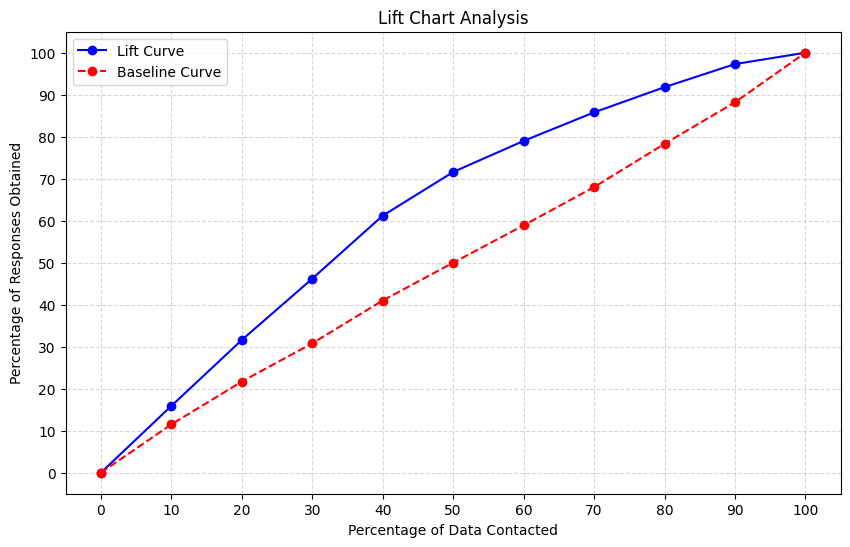

Top rows of sorted data (by predicted probabilities):


id  age  dist  income  gender  marital_status  target  predicted_probs
3917  3918   94     1       2       1               1       0         0.648670
2393  2394   94     2       2       1               1       1         0.645755
442    443   94     3       2       1               1       1         0.642830
862    863   90     2       1       1               1       0         0.628367
460    461   92     1       2       1               1       1         0.627109

Top rows of shuffled data (random order):


id  age  dist  income  gender  marital_status  target  predicted_probs
0   556   77     5      11       0               0       0         0.111251
1  3492   82     3      11       1               1       1         0.273661
2   528   80     3      11       0               1       0         0.186317
3  3926   73     1       3       1               0       0         0.285578
4  2990   69     5       2       1               1       0         0.353224

In [16]:

import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def lift_chart(data_sorted, data):
    """
    Computes and plots the lift chart and baseline curve.

    Parameters:
    - data_sorted: DataFrame sorted by predicted probabilities (descending order)
    - data: Original DataFrame for baseline curve computation

    Returns:
    - lift_chart_data: DataFrame containing the lift and baseline curve values
    """
    # Step 1: Total number of positive responses
    sum_responses = data_sorted['target'].sum()

    # Step 2: Initialize lists for lift curve and baseline curve
    lift_curve = []
    baseline_curve = []

    # Step 3: Compute lift and baseline curves across 0%-100% (in 10% increments)
    n_rows = len(data_sorted)

    for i in range(11):  # i from 0 to 10
        cutoff = int((i / 10) * n_rows)  # Calculate the number of rows for the given percentile
        
        # Lift Curve: Percentage of positive responses in top percentile
        lift_percentage = data_sorted.iloc[:cutoff]['target'].sum() / sum_responses * 100
        lift_curve.append(lift_percentage)
        
        # Baseline Curve: Random sampling of the same size from unsorted data
        baseline_percentage = data.iloc[:cutoff]['target'].sum() / sum_responses * 100
        baseline_curve.append(baseline_percentage)

    # Step 4: Create a DataFrame to store lift and baseline curves
    lift_chart_data = pd.DataFrame({
        'Lift Curve': lift_curve,
        'Baseline Curve': baseline_curve
    })

    lift_chart_data['diff'] = lift_chart_data['Lift Curve'] - lift_chart_data['Baseline Curve']

    # Step 5: Display the resulting lift chart data
    print("Lift Chart Data:")
    display(lift_chart_data)

    # Step 6: Plot the Lift and Baseline curves
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(0, 100, 11), lift_chart_data['Lift Curve'], label='Lift Curve', color='blue', marker='o')
    plt.plot(np.linspace(0, 100, 11), lift_chart_data['Baseline Curve'], label='Baseline Curve', color='red', linestyle='--', marker='o')

    # Customize the plot
    plt.title('Lift Chart Analysis')
    plt.xlabel('Percentage of Data Contacted')
    plt.ylabel('Percentage of Responses Obtained')
    plt.xticks(np.linspace(0, 100, 11))
    plt.yticks(np.linspace(0, 100, 11))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()







import statsmodels.api as sm
import pandas as pd

# Predictor and response variables
predictor = data[['age', 'income', 'dist', 'gender', 'marital_status']]
response = data['target']

# Add constant for intercept
predictor_with_const = sm.add_constant(predictor)

# Fit logistic regression model
logit_model = sm.Logit(response, predictor_with_const)
result = logit_model.fit()

# Predict probabilities for the positive class
data['predicted_probs'] = result.predict(predictor_with_const)

# Step 1: Sort the data by predicted probabilities in descending order
data_sorted = data.sort_values(by='predicted_probs', ascending=False)

# Step 2: Shuffle the data randomly
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 3: Call the lift_chart function
lift_chart(data_sorted, data_shuffled)

# Step 4: Display the top rows for both sorted and shuffled DataFrames
print("Top rows of sorted data (by predicted probabilities):")
display(data_sorted.head())

print("Top rows of shuffled data (random order):")
display(data_shuffled.head())

the lift curve is the cumulative percentage of all the posative outcomes sampled for each 10% of the data set. This tests how good our model is becuase the data the lift chart uses is ordered from greatest probability of posative outcome to least probability of posative outcome. When we build a better model next, you will see the differnece. 

notice how the lift chart is best in the middle of the interval, such that the most responses are yeilded where the predicted probability of posative outcome is furthest away form it's greatest and least. What this means is that the true predictor and response relationship is exactly not represneted by the model as where teh probabilites are at their least and greatest is when outcomes are most close to being selected at random.

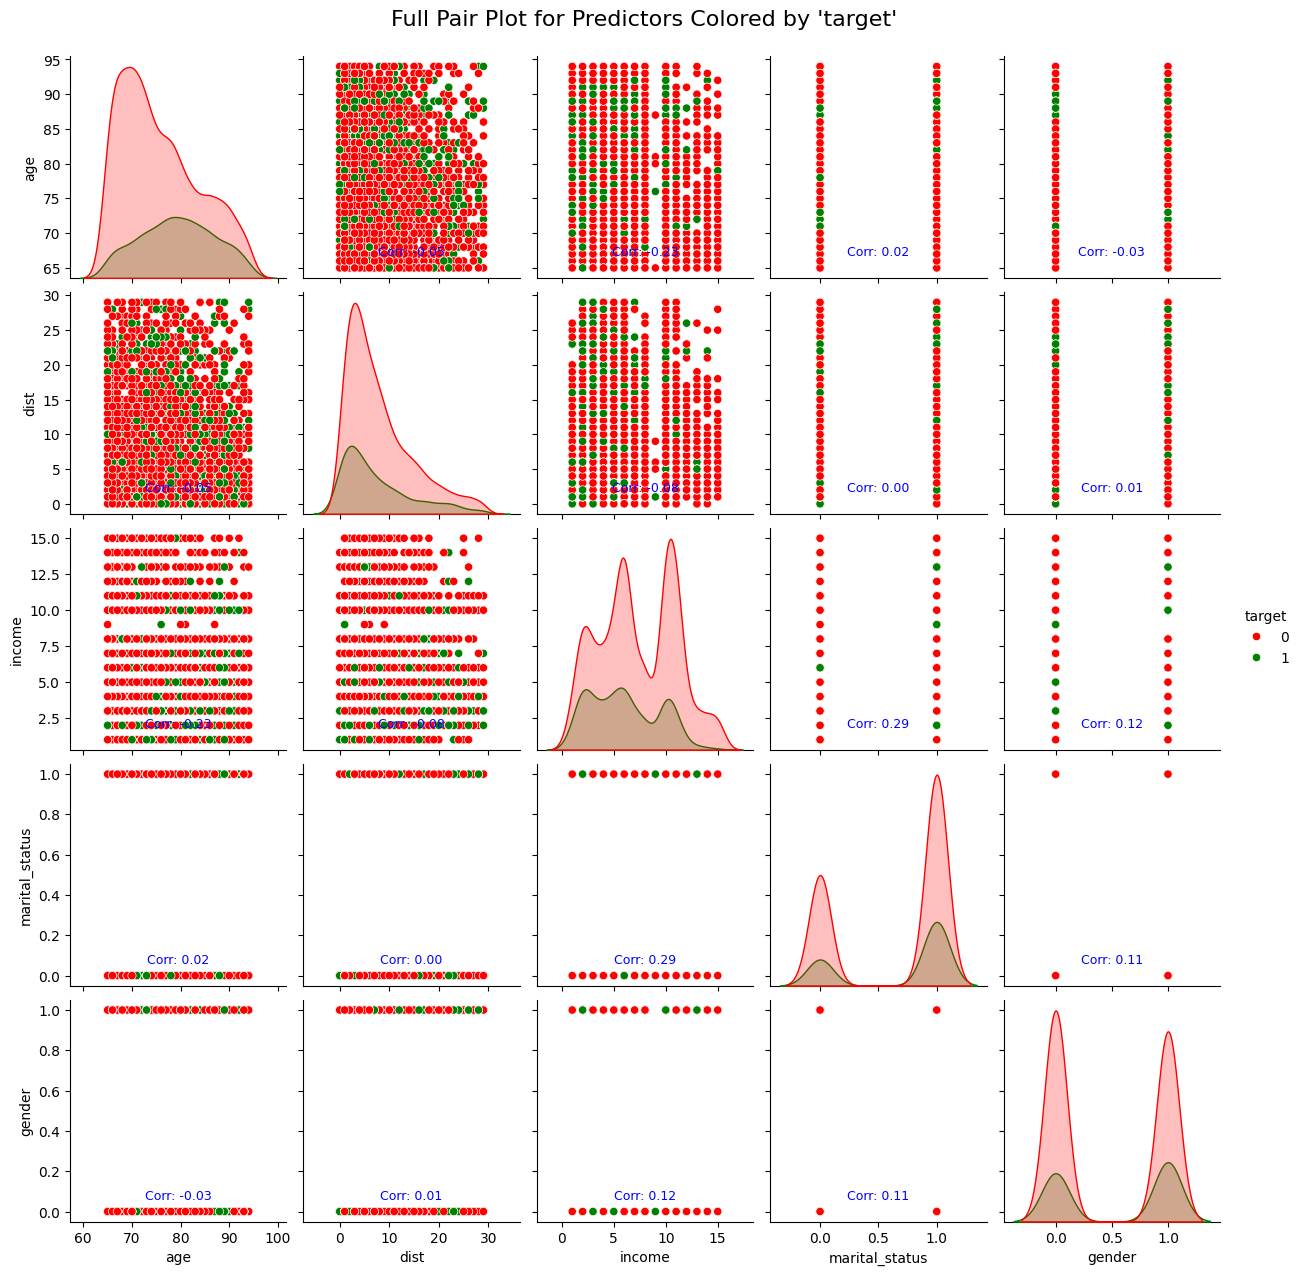

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_full_pairplot_with_corr_binary_target(df, continuous_vars, target_var='target', positive_value=1, negative_value=0):
    """
    Generate a Seaborn pair plot with correlation coefficients annotated on the scatter plots,
    showing a full matrix, and color-coded by a binary target variable.

    Parameters:
    - df: DataFrame containing the data.
    - continuous_vars: List of continuous variable column names.
    - target_var: Name of the binary target column (default='target').
    - positive_value: Value representing positive outcomes (default=1).
    - negative_value: Value representing negative outcomes (default=0).
    """
    # Filter DataFrame for the required columns
    pairplot_data = df[continuous_vars + [target_var]].copy()
    
    # Ensure the target variable is categorical for coloring
    pairplot_data[target_var] = pairplot_data[target_var].astype('category')
    
    # Calculate pairwise correlations
    correlation_matrix = pairplot_data[continuous_vars].corr()
    
    # Create the pair plot
    g = sns.pairplot(
        pairplot_data,
        hue=target_var,
        palette={positive_value: 'green', negative_value: 'red'},
        diag_kind='kde',
        corner=False  # Full matrix
    )
    
    # Annotate correlation coefficients
    for i, row_var in enumerate(continuous_vars):
        for j, col_var in enumerate(continuous_vars):
            if i != j:  # Skip diagonal
                # Get the current axis
                ax = g.axes[i, j]
                # Get the correlation value
                corr = correlation_matrix.loc[row_var, col_var]
                # Annotate the correlation on the scatter plot
                ax.annotate(
                    f"Corr: {corr:.2f}",
                    xy=(0.5, 0.1),
                    xycoords="axes fraction",
                    ha="center",
                    fontsize=9,
                    color="blue"
                )
    
    # Add a title for context
    plt.suptitle(f"Full Pair Plot for Predictors Colored by '{target_var}'", y=1.02, fontsize=16)
    plt.show()

# Continuous variables and target variable
continuous_vars = ['age', 'dist', 'income', 'marital_status', 'gender']
target_var = 'target'

# Call the function with the DataFrame
plot_full_pairplot_with_corr_binary_target(data, continuous_vars, target_var, positive_value=1, negative_value=0)

we're not seeing any kind of predictor response relationship for posative outcome within the relationships of the predictor vairables like we would need to build a logistic model with predictive power. 

Now we build a model more suited to this kind of data, a Random Forest model. 

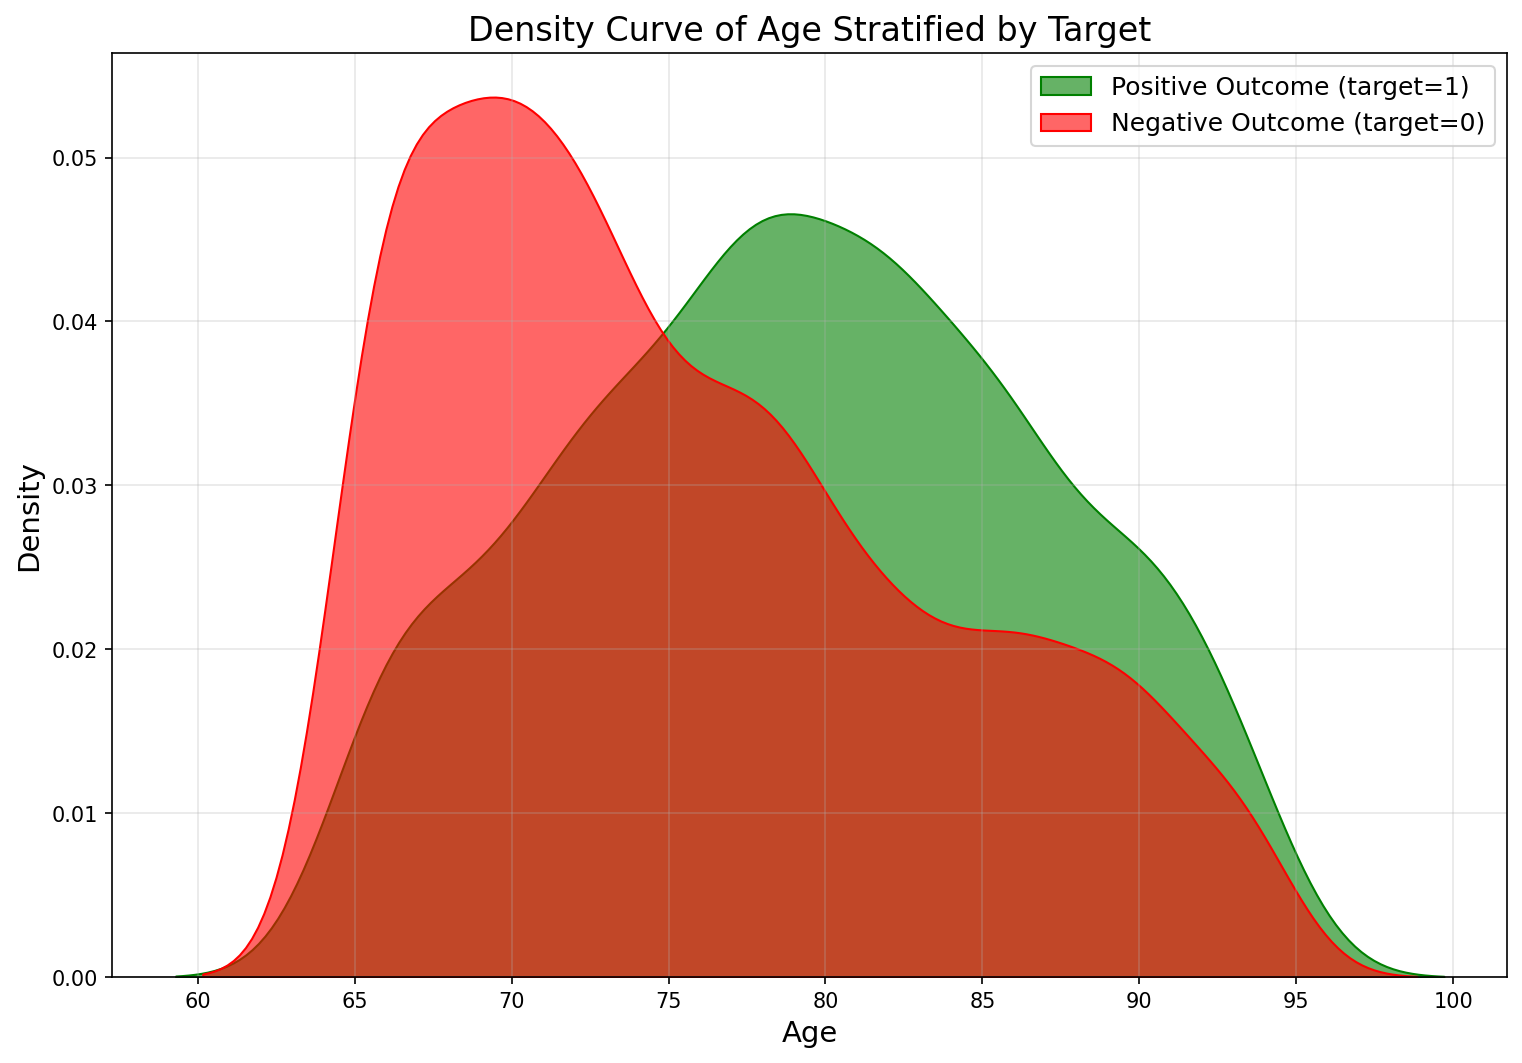

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_density_curve_by_target(df, variable, target_var='target', positive_value=1, negative_value=0):
    """
    Generate a high-resolution density curve for a variable stratified by positive and negative outcomes.

    Parameters:
    - df: DataFrame containing the data.
    - variable: Name of the continuous variable to plot.
    - target_var: Name of the binary target column (default='target').
    - positive_value: Value representing positive outcomes (default=1).
    - negative_value: Value representing negative outcomes (default=0).
    """
    plt.figure(figsize=(12, 8), dpi=150)  # High-resolution plot

    # Plot density curve for positive outcome
    sns.kdeplot(
        data=df[df[target_var] == positive_value],
        x=variable,
        fill=True,
        label=f"Positive Outcome ({target_var}={positive_value})",
        color='green',
        alpha=0.6
    )

    # Plot density curve for negative outcome
    sns.kdeplot(
        data=df[df[target_var] == negative_value],
        x=variable,
        fill=True,
        label=f"Negative Outcome ({target_var}={negative_value})",
        color='red',
        alpha=0.6
    )

    # Add labels and title
    plt.title(f"Density Curve of {variable.capitalize()} Stratified by {target_var.capitalize()}", fontsize=16)
    plt.xlabel(variable.capitalize(), fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    # Show the plot
    plt.show()

# Call the function with the DataFrame
plot_density_curve_by_target(data, 'age', target_var='target', positive_value=1, negative_value=0)

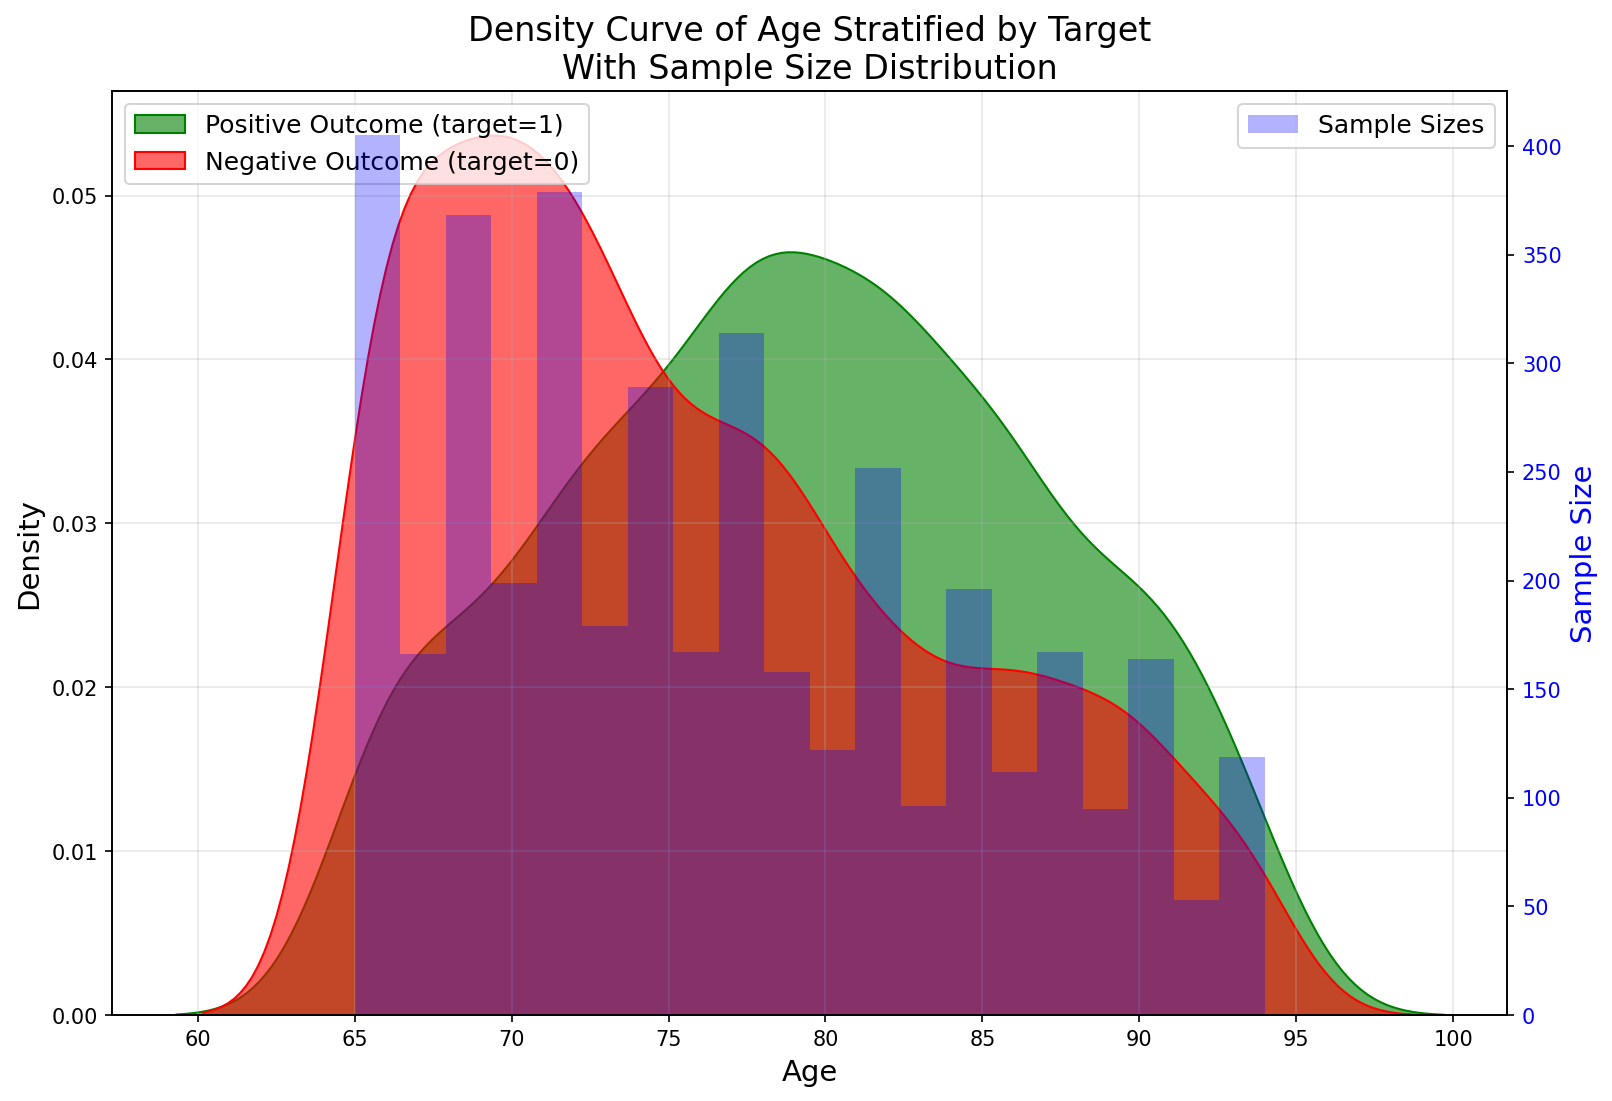

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_density_curve_with_sample_sizes(df, variable, target_var='target', positive_value=1, negative_value=0, bins=20):
    """
    Generate a high-resolution density curve for a variable stratified by positive and negative outcomes,
    overlayed with a histogram of sample sizes to account for changing sample sizes.

    Parameters:
    - df: DataFrame containing the data.
    - variable: Name of the continuous variable to plot.
    - target_var: Name of the binary target column (default='target').
    - positive_value: Value representing positive outcomes (default=1).
    - negative_value: Value representing negative outcomes (default=0).
    - bins: Number of bins for the histogram (default=20).
    """
    fig, ax1 = plt.subplots(figsize=(12, 8), dpi=150)

    # Density plot for positive outcomes
    sns.kdeplot(
        data=df[df[target_var] == positive_value],
        x=variable,
        fill=True,
        label=f"Positive Outcome ({target_var}={positive_value})",
        color='green',
        alpha=0.6,
        ax=ax1
    )

    # Density plot for negative outcomes
    sns.kdeplot(
        data=df[df[target_var] == negative_value],
        x=variable,
        fill=True,
        label=f"Negative Outcome ({target_var}={negative_value})",
        color='red',
        alpha=0.6,
        ax=ax1
    )

    # Adding histogram of sample sizes
    ax2 = ax1.twinx()
    bin_edges = np.linspace(df[variable].min(), df[variable].max(), bins + 1)
    counts, _ = np.histogram(df[variable], bins=bin_edges)
    ax2.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), align='edge', color='blue', alpha=0.3, label="Sample Sizes")

    # Customize axis labels
    ax1.set_title(f"Density Curve of {variable.capitalize()} Stratified by {target_var.capitalize()}\nWith Sample Size Distribution", fontsize=16)
    ax1.set_xlabel(variable.capitalize(), fontsize=14)
    ax1.set_ylabel('Density', fontsize=14)
    ax2.set_ylabel('Sample Size', fontsize=14, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Add legends
    ax1.legend(loc='upper left', fontsize=12)
    ax2.legend(loc='upper right', fontsize=12)

    # Grid and display
    ax1.grid(True, alpha=0.3)
    plt.show()

# Call the function with the DataFrame
plot_density_curve_with_sample_sizes(data, 'age', target_var='target', positive_value=1, negative_value=0)

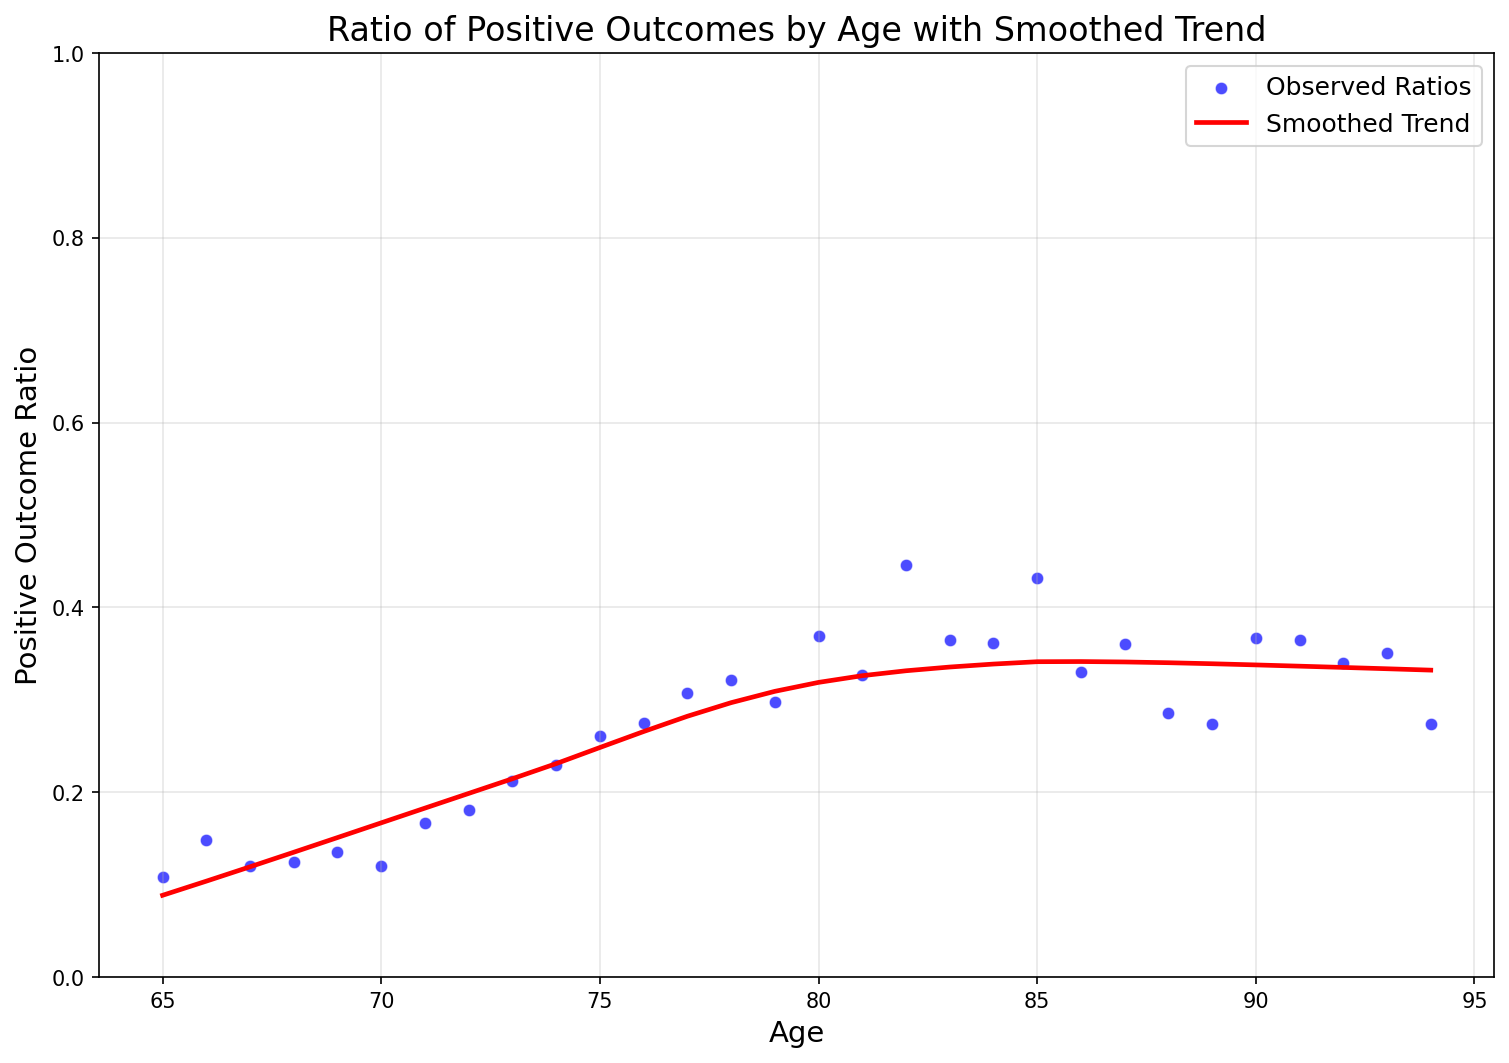

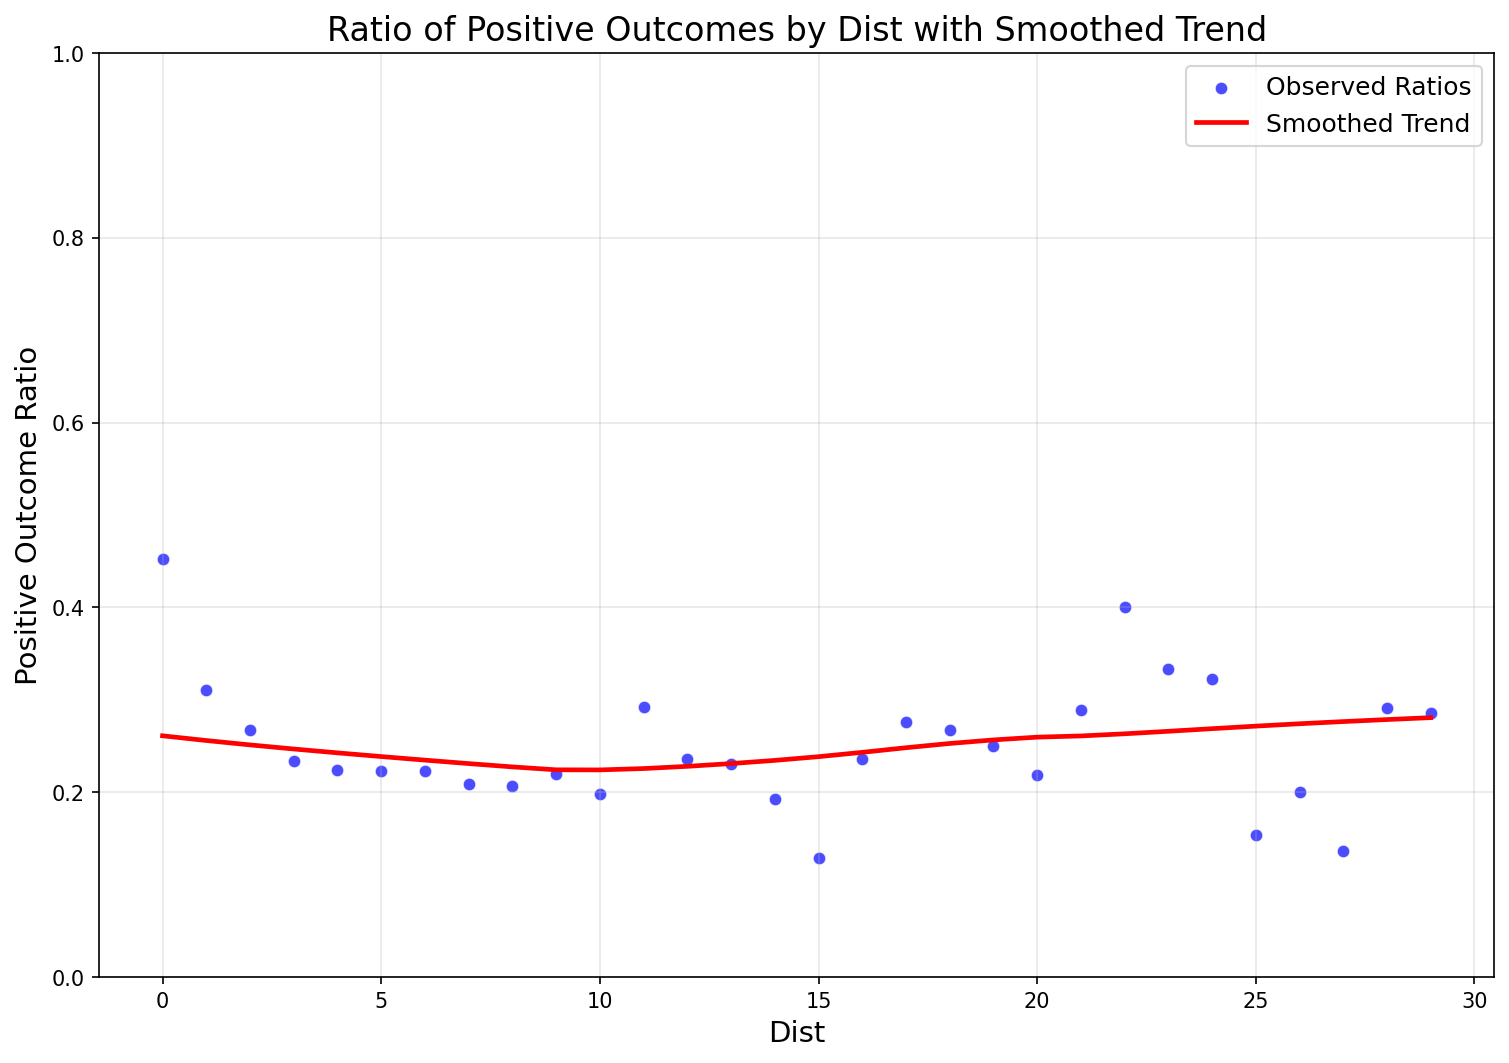

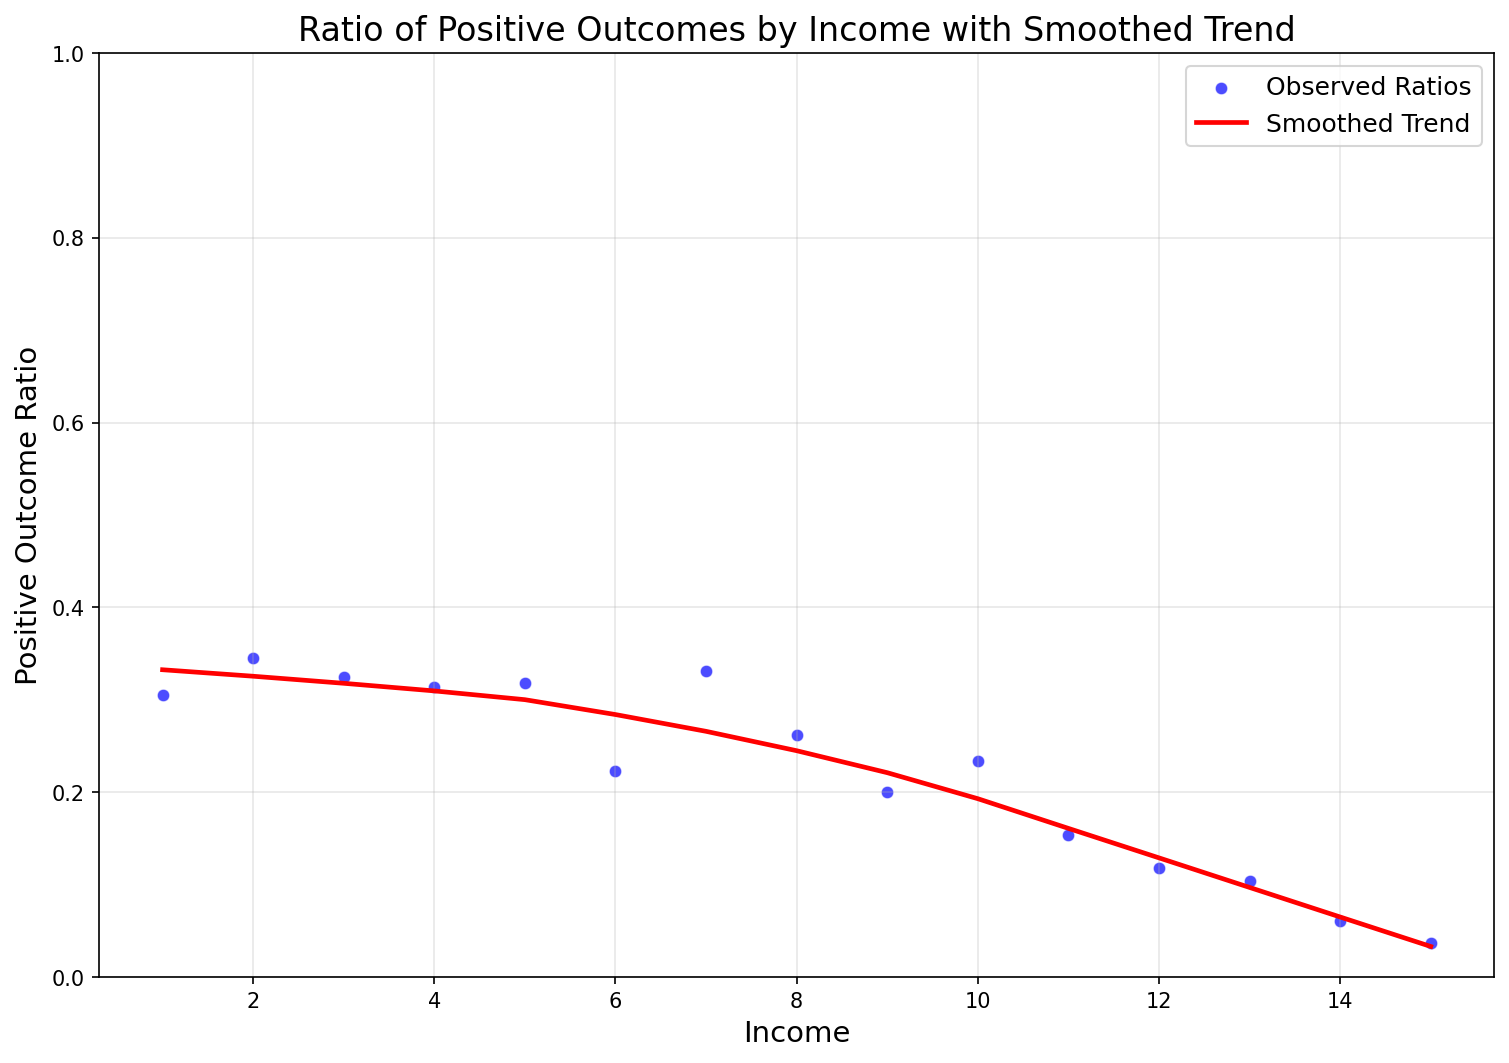

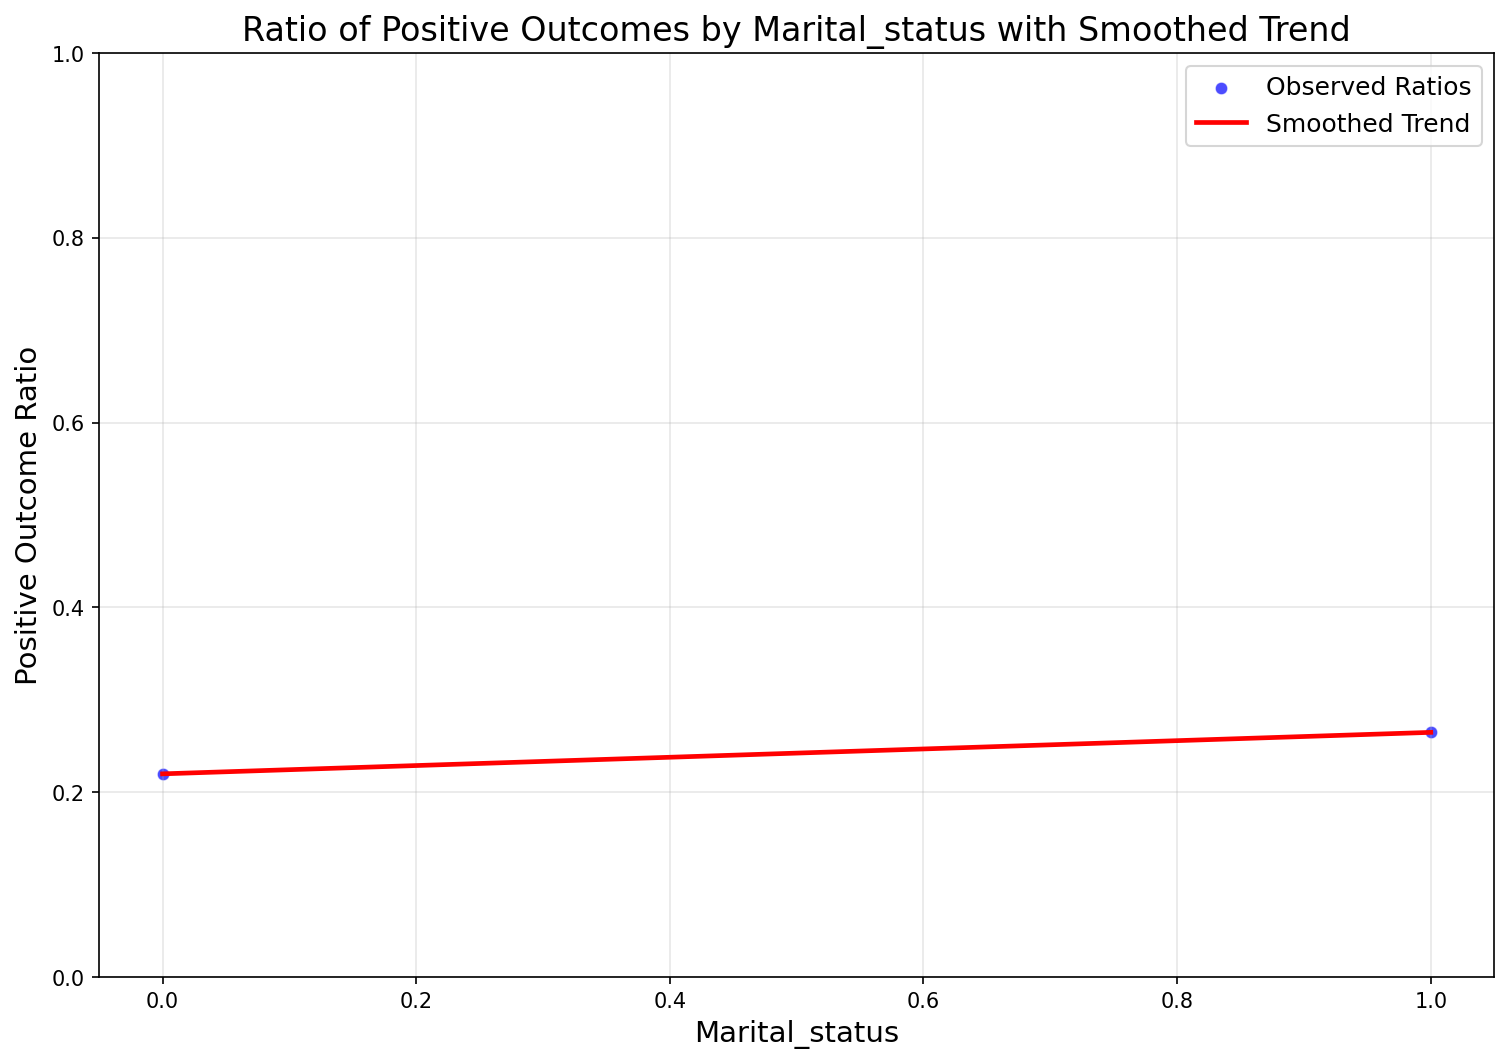

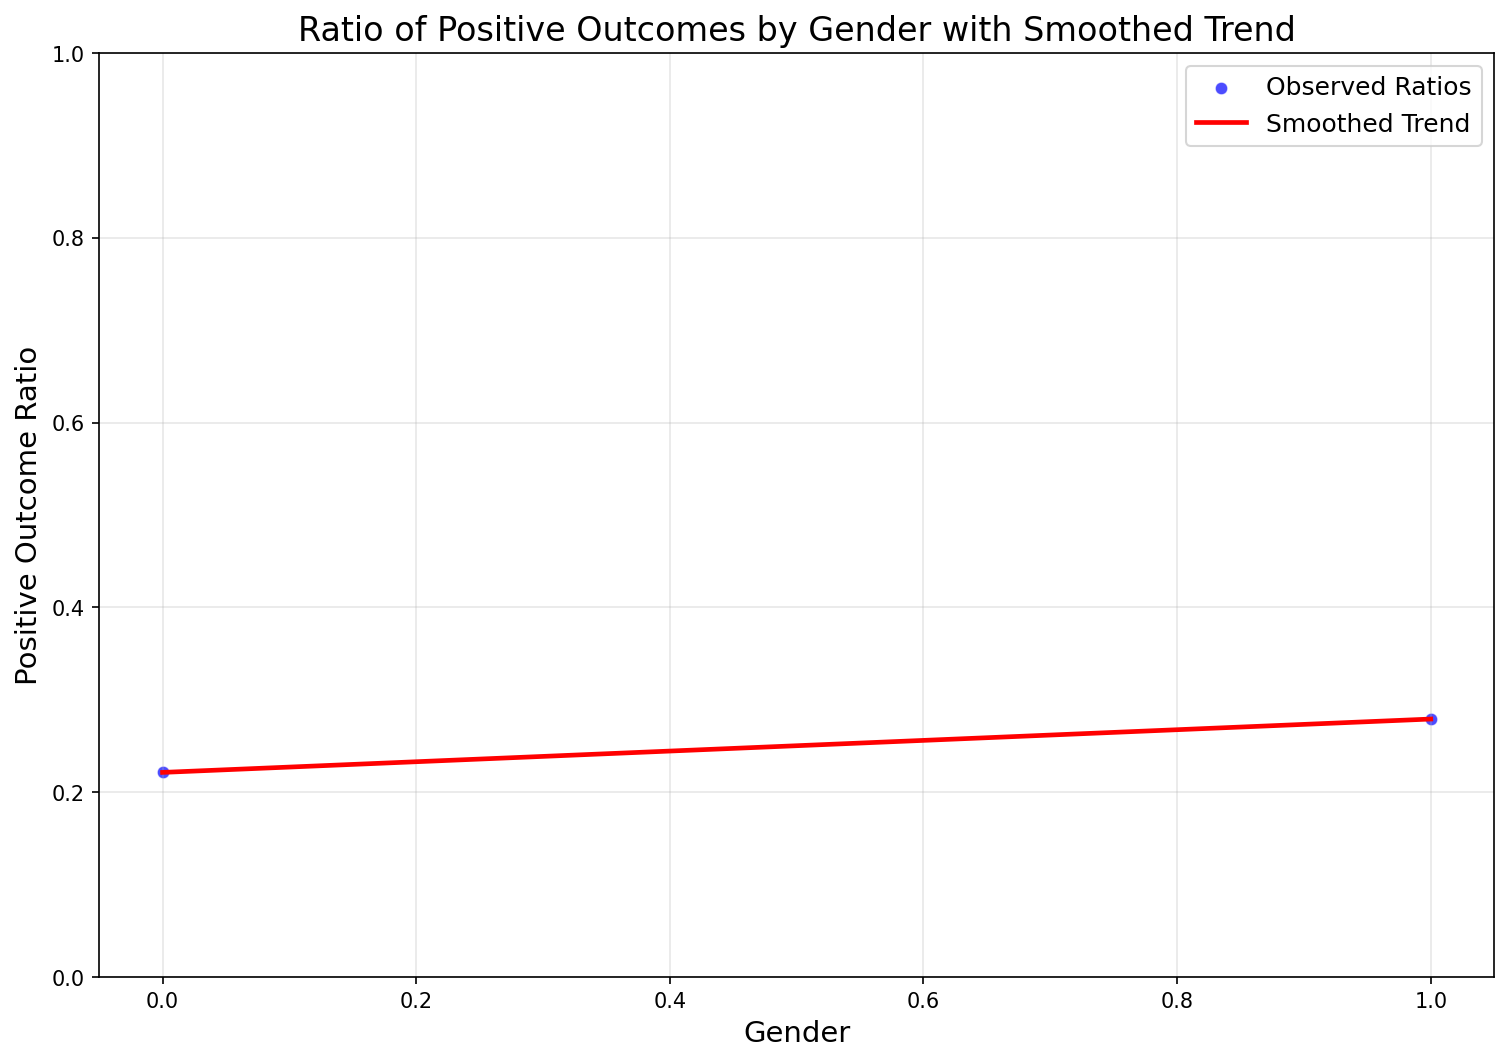

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_age_vs_positive_ratio(df, age_col, target_col, positive_value=1):
    """
    Generate a scatter plot of age vs. the ratio of positive outcomes to total outcomes, 
    and add a smoother to visualize the trend. Ensures y-axis is fixed from 0 to 1.

    Parameters:
    - df: DataFrame containing the data.
    - age_col: Column name for the age variable.
    - target_col: Column name for the binary target variable.
    - positive_value: Value representing positive outcomes (default=1).
    """
    # Calculate the ratio of positive outcomes for each age
    age_groups = df.groupby(age_col)[target_col].agg(
        total_outcomes='count',
        positive_outcomes=lambda x: (x == positive_value).sum()
    )
    age_groups['positive_ratio'] = age_groups['positive_outcomes'] / age_groups['total_outcomes']
    age_groups.reset_index(inplace=True)

    # Combined scatter plot and smoother
    plt.figure(figsize=(12, 8), dpi=150)
    sns.scatterplot(
        data=age_groups, 
        x=age_col, 
        y='positive_ratio', 
        color='blue', 
        alpha=0.7, 
        label='Observed Ratios'
    )
    sns.regplot(
        data=age_groups, 
        x=age_col, 
        y='positive_ratio', 
        scatter=False, 
        color='red', 
        lowess=True, 
        label='Smoothed Trend'
    )
    
    # Fix y-axis and add labels
    plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
    plt.title(f"Ratio of Positive Outcomes by {age_col.capitalize()} with Smoothed Trend", fontsize=16)
    plt.xlabel(age_col.capitalize(), fontsize=14)
    plt.ylabel('Positive Outcome Ratio', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

# Call the function for all variables
plot_age_vs_positive_ratio(data, 'age', 'target', positive_value=1)
plot_age_vs_positive_ratio(data, 'dist', 'target', positive_value=1)
plot_age_vs_positive_ratio(data, 'income', 'target', positive_value=1)
plot_age_vs_positive_ratio(data, 'marital_status', 'target', positive_value=1)
plot_age_vs_positive_ratio(data, 'gender', 'target', positive_value=1)

so here we see that from 65 to 80, age and posative responses are actually very well predictor vs response, controlling for sample size from 80 to 95 the predictive power of variable age does not increase. So none of these variables actually coorelate with posative outcomes directly

Accuracy: 0.67625

Confusion Matrix:
 [[490  93]
 [166  51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79       583
           1       0.35      0.24      0.28       217

    accuracy                           0.68       800
   macro avg       0.55      0.54      0.54       800
weighted avg       0.64      0.68      0.65       800



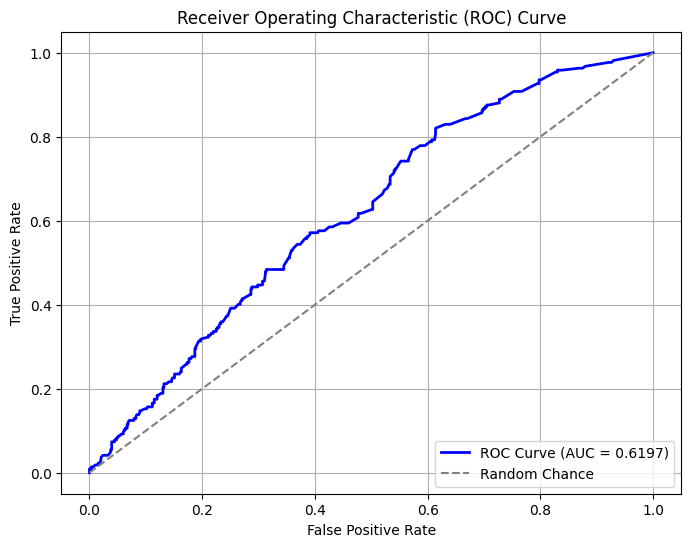

In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, RocCurveDisplay
)

def random_forest_model_with_roc(data, predictors, target, test_size=0.2, random_state=42):
    """
    Train and evaluate a Random Forest model and produce a ROC chart.

    Parameters:
    - data: Pandas DataFrame containing predictors and target.
    - predictors: List of column names used as features.
    - target: Name of the target column.
    - test_size: Proportion of the data to use for testing (default 0.2).
    - random_state: Random state for reproducibility (default 42).

    Returns:
    - model: Trained RandomForestClassifier model.
    """
    # Step 1: Split the data into train and test sets
    X = data[predictors]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Step 2: Initialize and train the Random Forest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=random_state)
    model.fit(X_train, y_train)

    # Step 3: Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    # Step 4: Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:\n", report)

    # Step 5: Generate and plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    return model

# Example Usage:
predictors = ['age', 'income', 'dist', 'gender', 'marital_status']
target = 'target'
trained_model = random_forest_model_with_roc(data, predictors, target)

Accuracy: 0.67625

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79       583
           1       0.35      0.24      0.28       217

    accuracy                           0.68       800
   macro avg       0.55      0.54      0.54       800
weighted avg       0.64      0.68      0.65       800



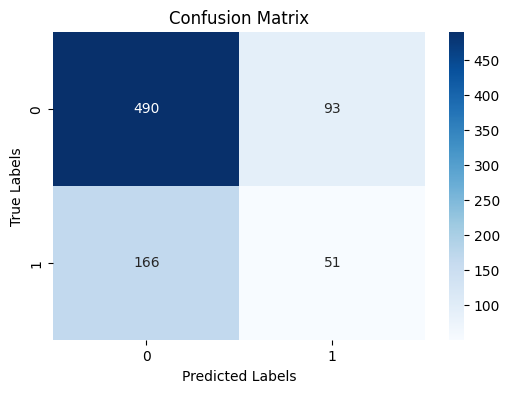

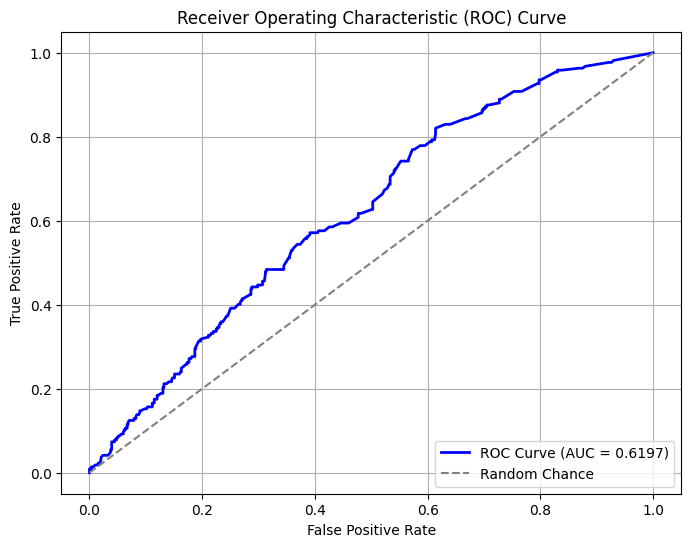

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, RocCurveDisplay
)
import seaborn as sns

def random_forest_model_with_roc(data, predictors, target, test_size=0.2, random_state=42):
    """
    Train and evaluate a Random Forest model and produce a ROC chart.

    Parameters:
    - data: Pandas DataFrame containing predictors and target.
    - predictors: List of column names used as features.
    - target: Name of the target column.
    - test_size: Proportion of the data to use for testing (default 0.2).
    - random_state: Random state for reproducibility (default 42).

    Returns:
    - model: Trained RandomForestClassifier model.
    """
    # Step 1: Split the data into train and test sets
    X = data[predictors]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Step 2: Initialize and train the Random Forest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=random_state)
    model.fit(X_train, y_train)

    # Step 3: Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    # Step 4: Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("\nClassification Report:\n", report)

    # Step 5: Display confusion matrix with labels
    labels = sorted(y.unique())
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Step 6: Generate and plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    return model

predictors = ['age', 'income', 'dist', 'gender', 'marital_status']
target = 'target'
trained_model = random_forest_model_with_roc(data, predictors, target)

The accuracy is inferior, but this time this accuracy is was from the model being evaluated on data from which it was not trained on.

Despite this, it's recall for posative outcomes is vastly superior. 

Lift Chart for Random Forest Model:
Lift Chart Data:


Lift Curve  Baseline Curve  diff
0          0.0             0.0   0.0
1         37.7            11.5  26.2
2         72.8            21.7  51.1
3         88.6            30.8  57.8
4         91.9            41.0  50.9
5         95.2            50.0  45.2
6         96.6            58.9  37.7
7         98.0            68.0  30.0
8         99.1            78.3  20.8
9         99.4            88.2  11.2
10       100.0           100.0   0.0

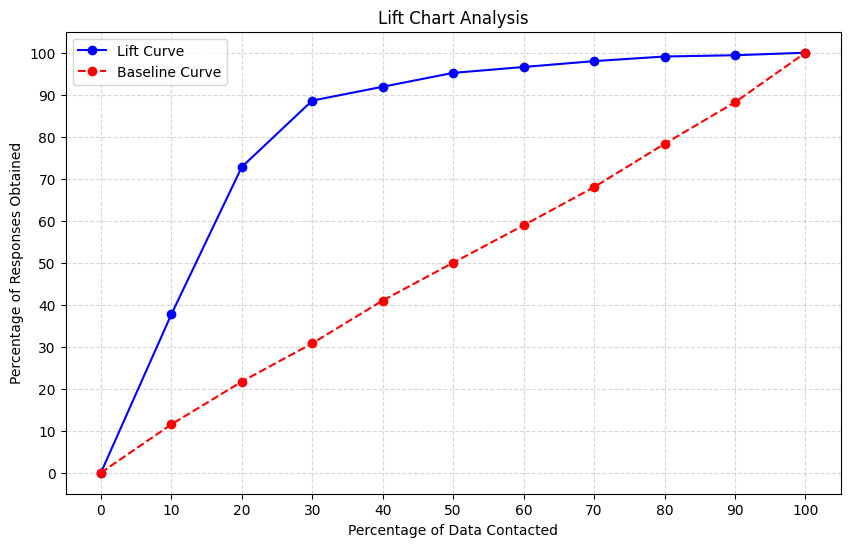

Top rows of sorted data (by predicted probabilities):


id  age  dist  income  gender  marital_status  target  predicted_probs
2726  2727   79     0       2       0               1       1             0.99
2071  2072   79     0       2       0               1       1             0.99
1016  1017   77     5      11       1               1       1             0.98
246    247   85     0       6       1               1       1             0.98
171    172   77     5      11       1               1       1             0.98

Top rows of shuffled data (random order):


id  age  dist  income  gender  marital_status  target  predicted_probs
0   556   77     5      11       0               0       0            0.050
1  3492   82     3      11       1               1       1            0.080
2   528   80     3      11       0               1       0            0.250
3  3926   73     1       3       1               0       0            0.205
4  2990   69     5       2       1               1       0            0.285

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Train the Random Forest model and predict probabilities
predictors = ['age', 'income', 'dist', 'gender', 'marital_status']
target = 'target'

# Split data into training and test sets
X = data[predictors]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities for the positive class on the **entire dataset**
data['predicted_probs'] = rf_model.predict_proba(X)[:, 1]

# Step 2: Sort the data by predicted probabilities in descending order
data_sorted_rf = data.sort_values(by='predicted_probs', ascending=False)

# Step 3: Shuffle the data randomly
data_shuffled_rf = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 4: Call the lift_chart function
print("Lift Chart for Random Forest Model:")
lift_chart(data_sorted_rf, data_shuffled_rf)

# Step 5: Display the top rows for both sorted and shuffled DataFrames
print("Top rows of sorted data (by predicted probabilities):")
display(data_sorted_rf.head())

print("Top rows of shuffled data (random order):")
display(data_shuffled_rf.head())

Thus with the random forest model being evaluated on data from which it was not trained, by contacting only 30% of the customer base it yeilded 90% of all the responses. 

For a detailed explanation of logistic regression binary classifiers, refer to this invaluable resource: Binary Classification in R.

When the model predicts the probability of an individual being 90+ days past due (90+DPD), we must decide on a decision threshold—the minimum predicted probability at which we conclude thatFor a detailed explanation of logistic regression binary classifiers, refer to this invaluable resource: Binary Classification in R.

When the model predicts the probability of an individual being 90+ days past due (90+DPD), we must decide on a decision threshold—the minimum predicted probability at which we conclude that 

Optimization terminated successfully.
         Current function value: 0.527865
         Iterations 6


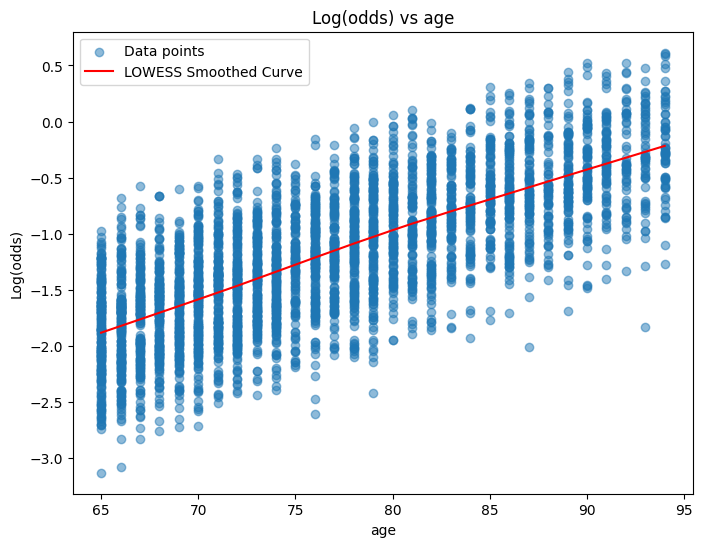

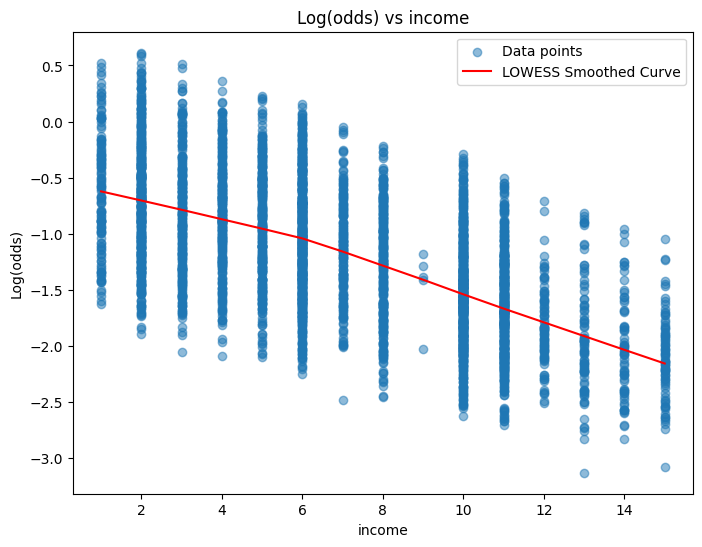

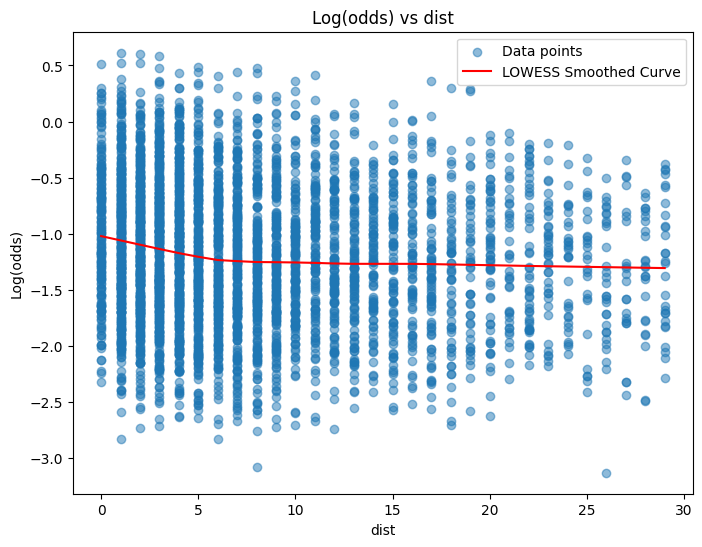

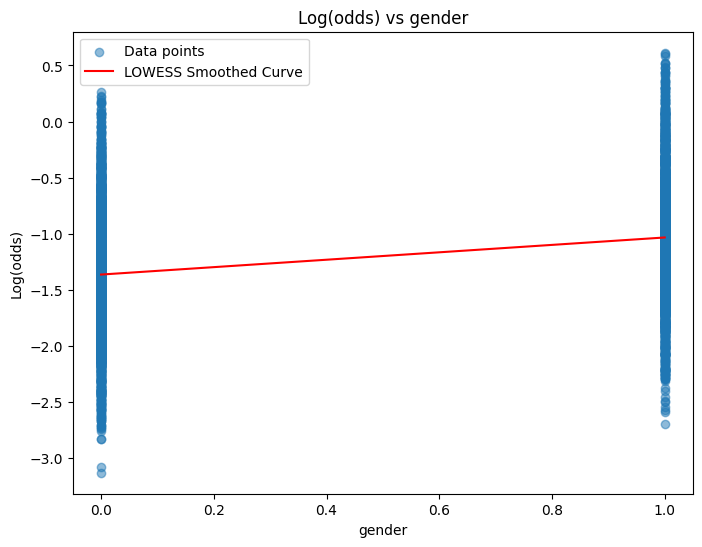

/opt/miniconda3/lib/python3.12/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


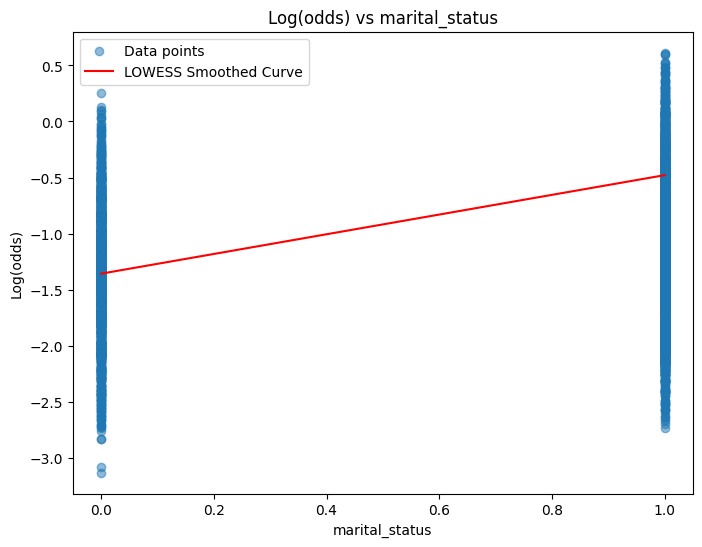

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.api import Logit, add_constant
from statsmodels.nonparametric.smoothers_lowess import lowess

# Predictor and response variables
predictor = data[['age', 'income', 'dist', 'gender', 'marital_status']]
response = data['target']

# Add constant for intercept
predictor_with_const = add_constant(predictor)

# Fit logistic regression model
logit_model = Logit(response, predictor_with_const)
result = logit_model.fit()

# Calculate predicted probabilities
predicted_probs = result.predict(predictor_with_const)  # Probability of the positive class

# Calculate log(odds)
log_odds = np.log(predicted_probs / (1 - predicted_probs))

# Plot the log(odds) curve for each predictor
for col in predictor.columns:
    plt.figure(figsize=(8, 6))
    
    # Scatter plot
    plt.scatter(predictor[col], log_odds, alpha=0.5, label='Data points')
    
    # Add LOWESS smoothed curve
    lowess_smoothed = lowess(log_odds, predictor[col])
    plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='red', label='LOWESS Smoothed Curve')
    
    # Labels and title
    plt.title(f'Log(odds) vs {col}')
    plt.xlabel(col)
    plt.ylabel('Log(odds)')
    plt.legend()
    plt.show()

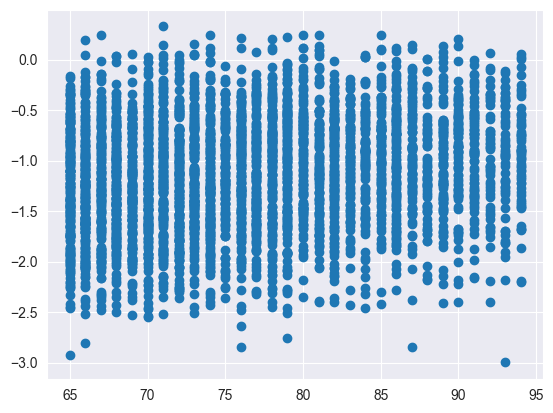

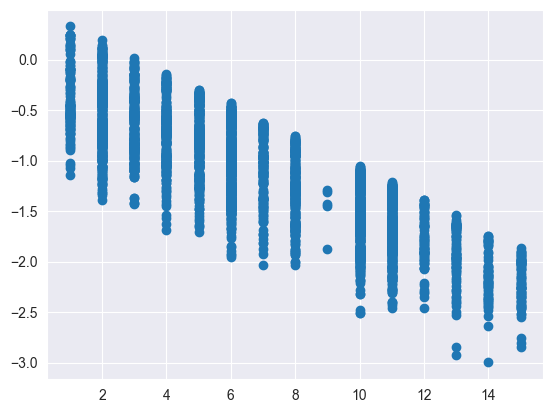

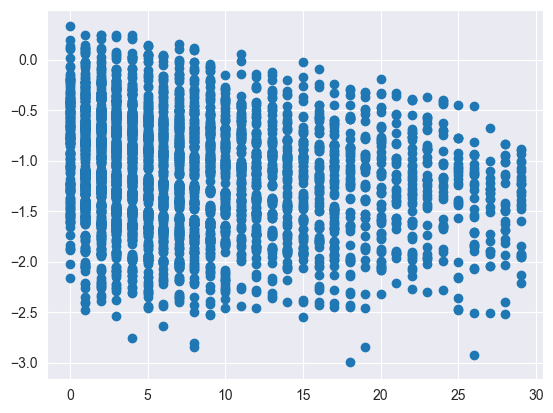

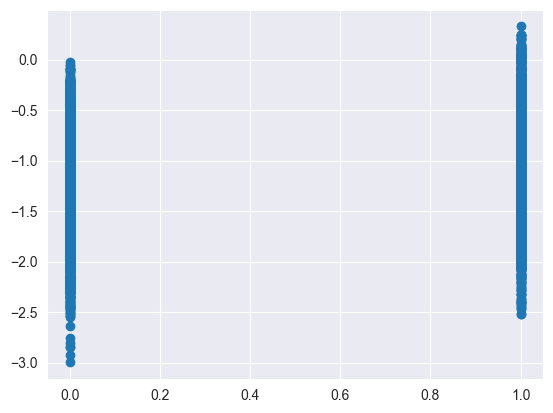

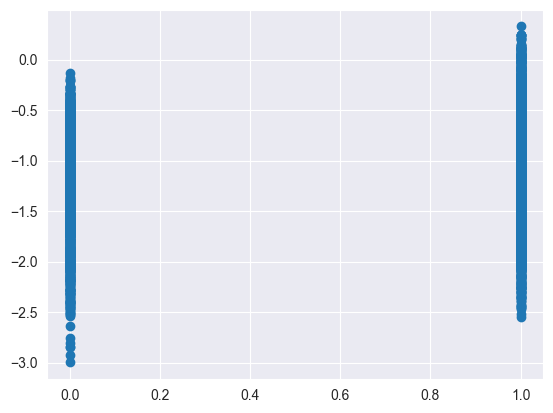

In [25]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import math
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")


X = data[['age', 'income', 'dist', 'gender', 'marital_status']]
y = data['target']


logit_results = GLM(y, X, family=families.Binomial()).fit()
predicted = logit_results.predict(X)

# Get log odds values
log_odds = np.log(predicted / (1 - predicted))

# Visualize predictor continuous variable vs logit values (Age)
plt.scatter(x = data['age'].values, y = log_odds);
plt.show()
plt.scatter(x = data['income'].values, y = log_odds);
plt.show()
plt.scatter(x = data['dist'].values, y = log_odds);
plt.show()

plt.scatter(x = data['gender'].values, y = log_odds);
plt.show()

plt.scatter(x = data['marital_status'].values, y = log_odds);
plt.show()


plt.show()
# Confirming that there is logit linearity for the Age variable 
# (Recall earlier that p value for Age:Log Age is 0.101)

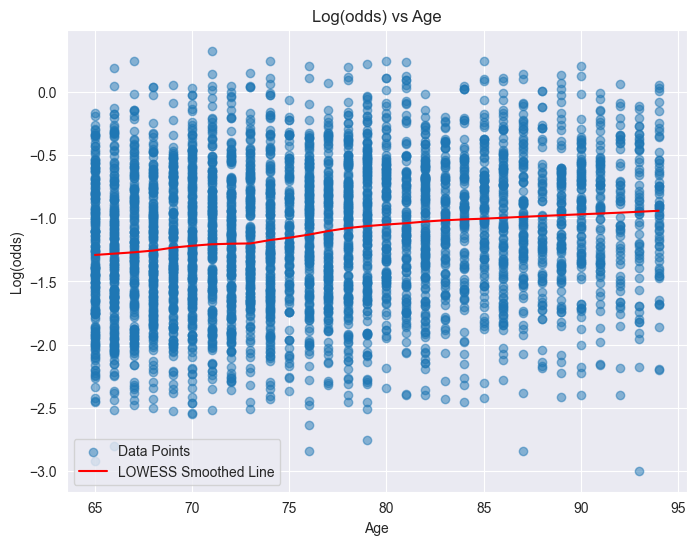

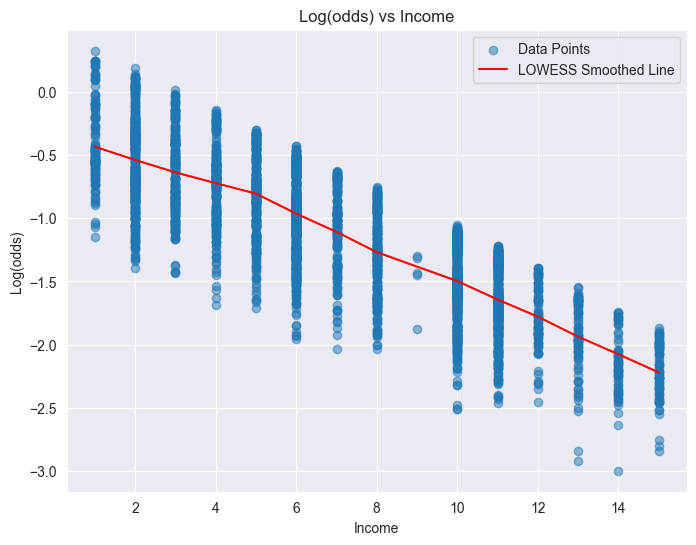

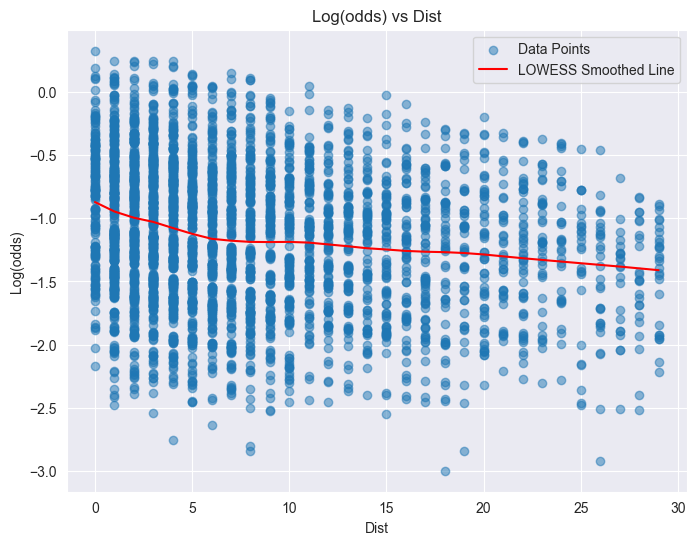

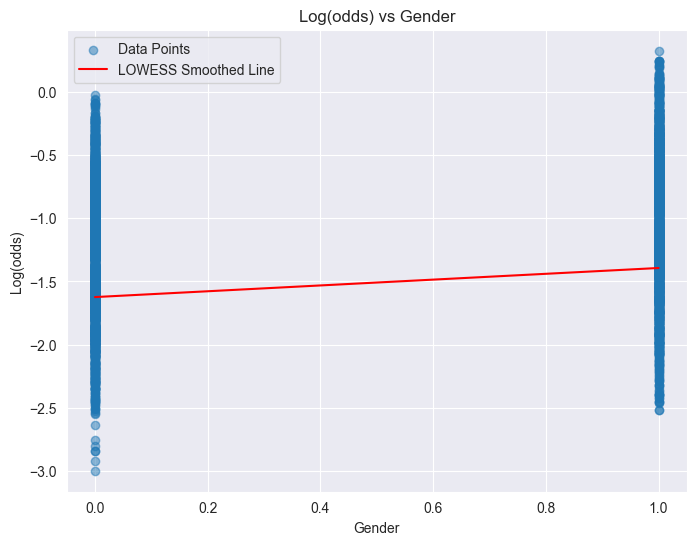

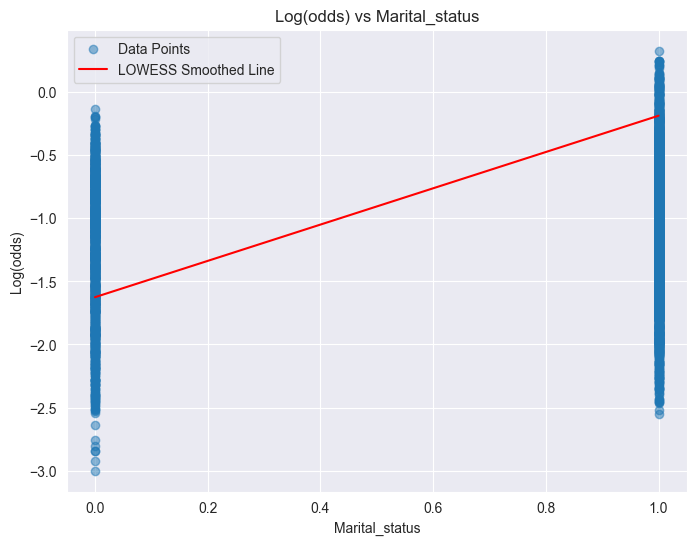

In [26]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.nonparametric.smoothers_lowess import lowess

# Define predictors and response
X = data[['age', 'income', 'dist', 'gender', 'marital_status']]
y = data['target']

# Fit GLM logistic regression model
logit_results = GLM(y, X, family=families.Binomial()).fit()
predicted = logit_results.predict(X)

# Get log odds values
log_odds = np.log(predicted / (1 - predicted))

# List of predictors for iteration
predictor_names = ['age', 'income', 'dist', 'gender', 'marital_status']

# Plot each predictor vs log(odds) with smoothed line
for predictor in predictor_names:
    plt.figure(figsize=(8, 6))
    
    # Scatter plot
    plt.scatter(x=data[predictor].values, y=log_odds, alpha=0.5, label='Data Points')
    
    # Add LOWESS smoothed line
    lowess_smoothed = lowess(log_odds, data[predictor].values, frac=0.3)
    plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='red', label='LOWESS Smoothed Line')
    
    # Labels and title
    plt.title(f'Log(odds) vs {predictor.capitalize()}')
    plt.xlabel(predictor.capitalize())
    plt.ylabel('Log(odds)')
    plt.legend()
    plt.show()